In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.stats import gmean
import scipy.stats as stats
import statsmodels.api as sm
from statistics import median, mean, stdev
import seaborn as sns
from scipy import stats 
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.optimize import minimize
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint
import math
from scipy.stats import gmean
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller,kpss
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
#!pip uninstall pandas
#!pip install --upgrade pandas==1.2.4
#!pip install --user  pandas

In [3]:
A = pd.read_csv('./Data/Pickle Files/Processed_Dataframes/Disease_Proc_df.csv')

In [4]:
A.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)

In [5]:
A['State'] == 'CA'

0      False
1      False
2      False
3      False
4      False
       ...  
619    False
620    False
621    False
622    False
623    False
Name: State, Length: 624, dtype: bool

In [6]:
cal1 = A[(A['State'] == 'CA')]
tex1 =  A[(A['State'] == 'TX') ]
ny1=   A[(A['State'] == 'NY')]

In [7]:
ny1.reset_index(inplace = True)
cal1.reset_index(inplace = True)
tex1.reset_index(inplace = True)

In [8]:
ny1.set_index('Year', inplace = True)
cal1.set_index('Year', inplace = True)
tex1.set_index('Year', inplace = True)

In [9]:
ny1.drop(['index', 'State',  'StateDesc'], axis = 1, inplace = True)
cal1.drop(['index', 'State',  'StateDesc'],axis = 1, inplace = True)
tex1.drop(['index', 'State',  'StateDesc'],axis = 1, inplace = True)

In [10]:
cal = cal1[:-4]
tex = tex1[:-4]
ny = ny1[:-4]

In [11]:
tex1

,CAN10_1,CAN11_1,CAN5_1,CAN6_1,CAN7_1,CAN8_1,CAN9_1
Year,,,,,,,
2008,10.600000,111.700000,115.000000,9.250000,38.850000,55.250000,13.200000
2009,10.625000,107.975000,115.000000,9.225000,38.550000,54.500000,13.075000
2010,10.683333,104.616667,114.750000,9.216667,38.283333,53.933333,13.016667
2011,10.775000,102.250000,114.850000,9.212500,38.125000,53.375000,13.025000
2012,10.860000,100.400000,115.090000,9.220000,38.000000,52.890000,12.970000
2013,11.000000,97.050000,115.440000,9.220000,37.750000,51.850000,12.950000
2014,11.160000,95.900000,116.070000,9.240000,37.690000,50.960000,13.050000
2015,11.300000,96.690000,117.290000,9.270000,37.760000,50.030000,13.280000
2016,11.362500,97.075000,117.825000,9.287500,37.787500,49.612500,13.337500


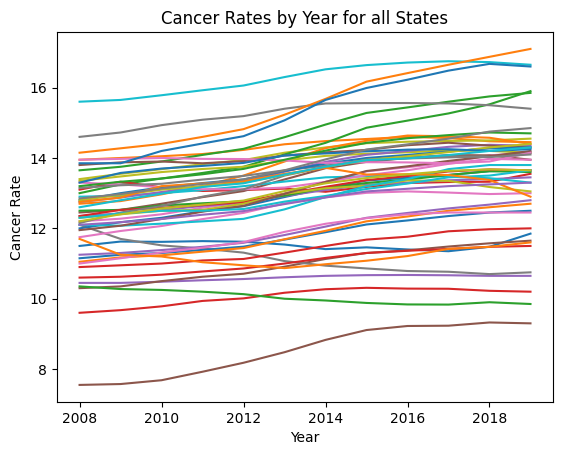

In [12]:
import matplotlib.pyplot as plt

# group the data by state
state_groups = A.groupby('State')

# plot each state's cancer rates over time
for state, group in state_groups:
    plt.plot(group['Year'], group['CAN10_1'], label=state)
    #plot_acf(group['CAN10_1'], label = state)
    #plot_pacf(group['CAN10_1'].squeeze(), lags = 5, title = state)

# add plot title and axis labels
plt.title('Cancer Rates by Year for all States')
plt.xlabel('Year')
plt.ylabel('Cancer Rate')

plt.show()

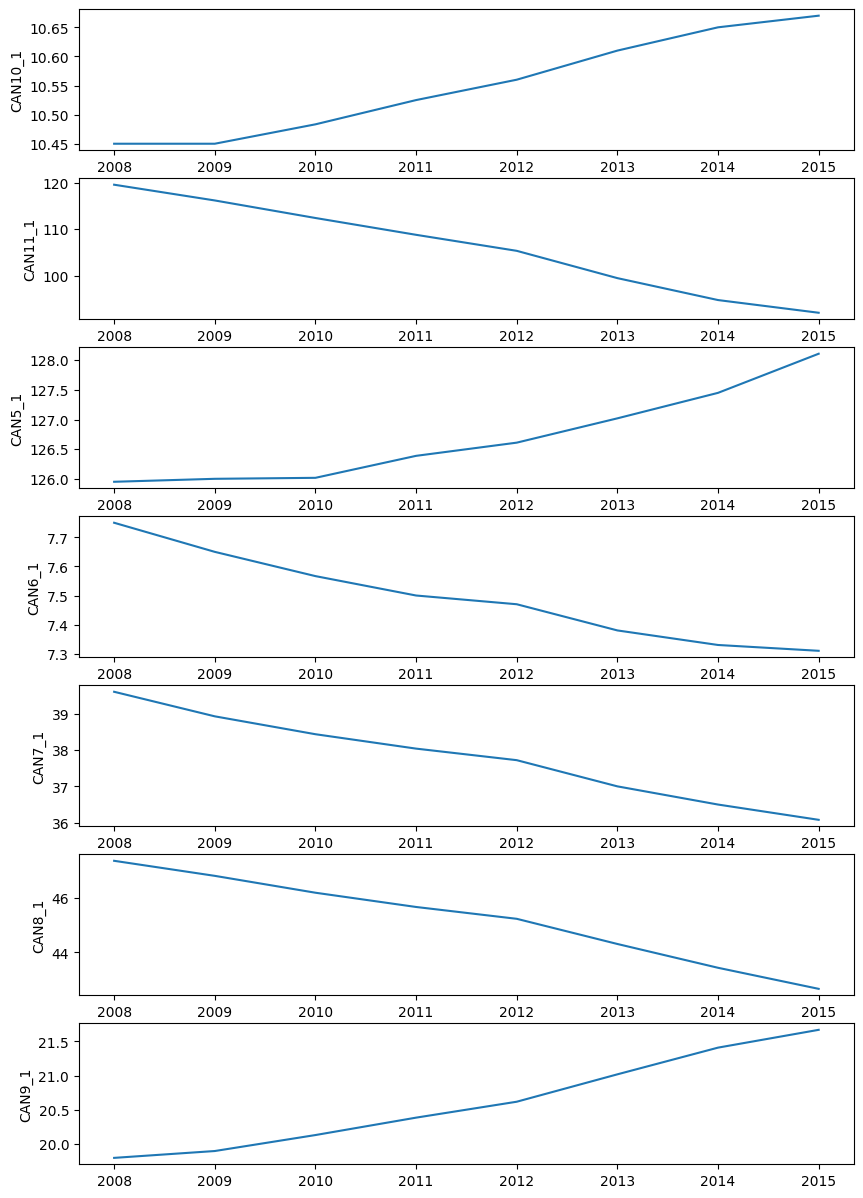

In [13]:
fig, axes = plt.subplots(7, 1, figsize=(10, 15))

axes[0].plot(cal['CAN10_1'])
axes[0].set_ylabel('CAN10_1')

axes[1].plot(cal['CAN11_1'])
axes[1].set_ylabel('CAN11_1')

axes[2].plot(cal['CAN5_1'])
axes[2].set_ylabel('CAN5_1')

axes[3].plot(cal['CAN6_1'])
axes[3].set_ylabel('CAN6_1')

axes[4].plot(cal['CAN7_1'])
axes[4].set_ylabel('CAN7_1')

axes[5].plot(cal['CAN8_1'])
axes[5].set_ylabel('CAN8_1')

axes[6].plot(cal['CAN9_1'])
axes[6].set_ylabel('CAN9_1')

plt.show()

In [ ]:
fig, axes = plt.subplots(7, 1, figsize=(10, 15))

axes[0].plot(cal['CAN10_1'].diff().dropna())
axes[0].set_ylabel('CAN10_1')

axes[1].plot(cal['CAN11_1'].diff().dropna())
axes[1].set_ylabel('CAN11_1')

axes[2].plot(cal['CAN5_1'].diff().dropna())
axes[2].set_ylabel('CAN5_1')

axes[3].plot(cal['CAN6_1'].diff().dropna())
axes[3].set_ylabel('CAN6_1')

axes[4].plot(cal['CAN7_1'].diff().dropna())
axes[4].set_ylabel('CAN7_1')

axes[5].plot(cal['CAN8_1'].diff().dropna())
axes[5].set_ylabel('CAN8_1')

axes[6].plot(cal['CAN9_1'].diff().dropna())
axes[6].set_ylabel('CAN9_1')

plt.show()

In [14]:
cal.columns

Index(['CAN10_1', 'CAN11_1', 'CAN5_1', 'CAN6_1', 'CAN7_1', 'CAN8_1', 'CAN9_1'], dtype='object')

In [15]:
from statsmodels.tsa.stattools import adfuller
# p - value of adfuller test for the returns
for i in ny.columns: 
    #print(adfuller(cal[i].diff().dropna())[1])
    adf_result = adfuller(ny[i].dropna())
    print('ADF Statistic: ', adf_result[0])
    print('p-value: ', adf_result[1])

ADF Statistic:  210.4377932228856
p-value:  1.0
ADF Statistic:  -6.205078120385624
p-value:  5.683663692855112e-08
ADF Statistic:  2.63974855468935
p-value:  0.9990814536386641
ADF Statistic:  -2.7320198159598528
p-value:  0.06865943581594153
ADF Statistic:  -0.7634728432278227
p-value:  0.8296169392893501
ADF Statistic:  -3.6903876407790226
p-value:  0.004250410188063381
ADF Statistic:  -1.0771776056108533
p-value:  0.7240868810415038


In [16]:
from statsmodels.tsa.stattools import adfuller
# p - value of adfuller test for the returns
for i in cal.columns: 
    kpss_result = kpss(cal[i])
    print('KPSS Statistic: ', kpss_result[0])
    print('p-value: ', kpss_result[1])

KPSS Statistic:  0.4826742250959648
p-value:  0.045568868221629553
KPSS Statistic:  0.4938988658853872
p-value:  0.04304079597175965
KPSS Statistic:  0.47726321132871535
p-value:  0.046787565016055105
KPSS Statistic:  0.4935233383263129
p-value:  0.043125374250830434
KPSS Statistic:  0.5004914303684741
p-value:  0.04155598415124458
KPSS Statistic:  0.49590250695029187
p-value:  0.04258952546164598
KPSS Statistic:  0.487796593699484
p-value:  0.044415181599215314


In [17]:
from statsmodels.tsa.stattools import adfuller
# p - value of adfuller test for the returns
for i in tex.columns: 
    kpss_result = kpss(tex[i])
    print('KPSS Statistic: ', kpss_result[0])
    print('p-value: ', kpss_result[1])

KPSS Statistic:  0.48285046626868766
p-value:  0.04552917426380909
KPSS Statistic:  0.47857292569464954
p-value:  0.046492584303006866
KPSS Statistic:  0.40093671200972986
p-value:  0.07675141723718541
KPSS Statistic:  0.20020555935117293
p-value:  0.1
KPSS Statistic:  0.4739891239002396
p-value:  0.04752497209454063
KPSS Statistic:  0.4980024024259721
p-value:  0.04211657603018647
KPSS Statistic:  0.1731423058073987
p-value:  0.1


In [18]:
from statsmodels.tsa.stattools import adfuller
# p - value of adfuller test for the returns
for i in ny.columns: 
    kpss_result = kpss(ny[i])
    print('KPSS Statistic: ', kpss_result[0])
    print('p-value: ', kpss_result[1])

KPSS Statistic:  0.47931814819236834
p-value:  0.046324741398115245
KPSS Statistic:  0.4884887190091453
p-value:  0.04425929752046277
KPSS Statistic:  0.48319244858287647
p-value:  0.04545215122007287
KPSS Statistic:  0.4887250865583902
p-value:  0.044206061585948156
KPSS Statistic:  0.5001323676562547
p-value:  0.04163685413147417
KPSS Statistic:  0.49165307385345425
p-value:  0.04354660498796076
KPSS Statistic:  0.5008298604358978
p-value:  0.041479761163086076


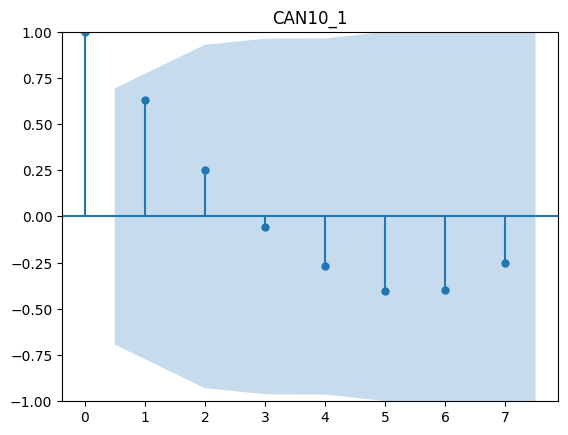

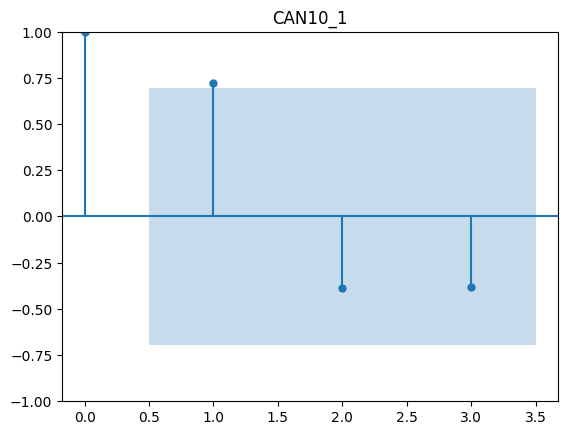

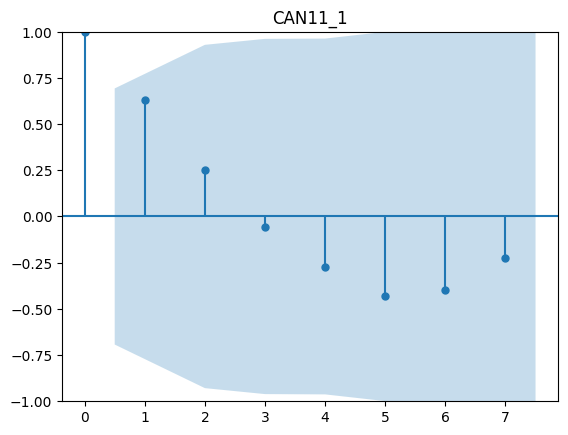

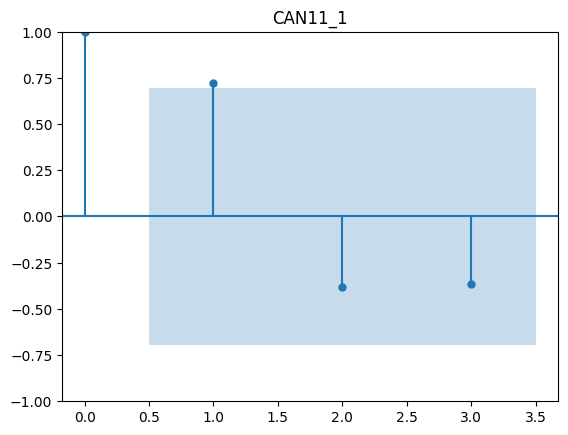

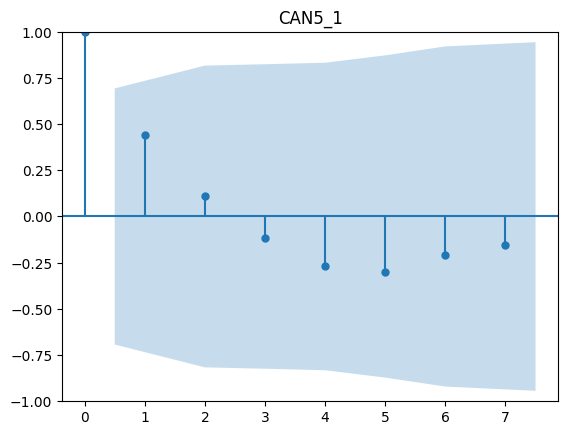

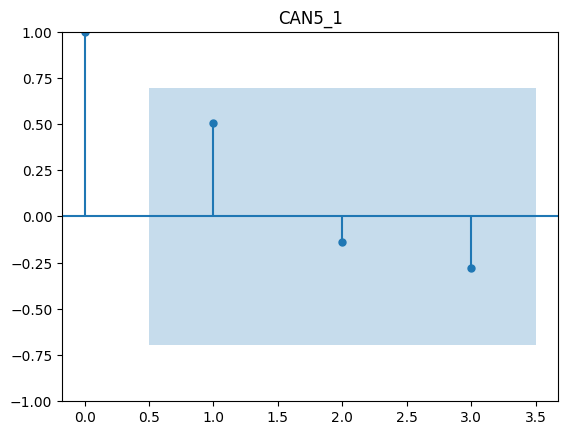

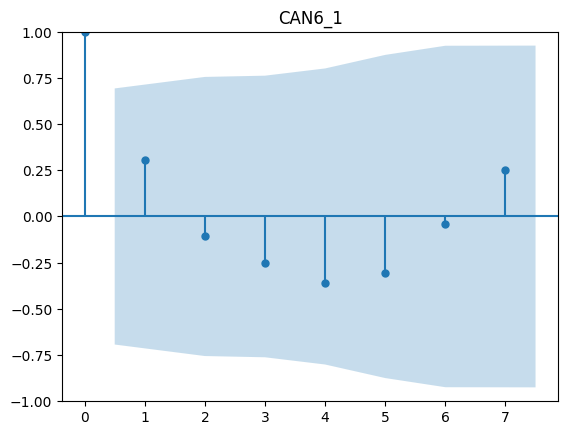

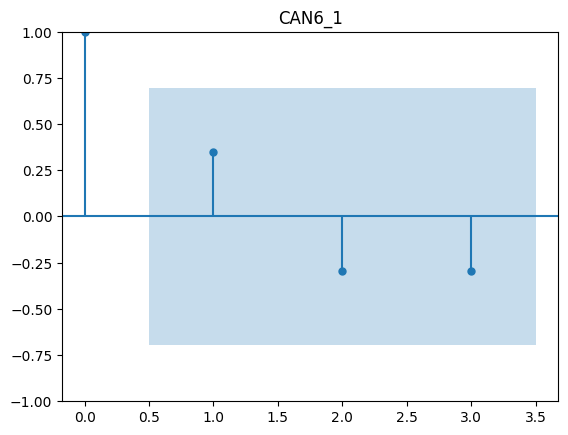

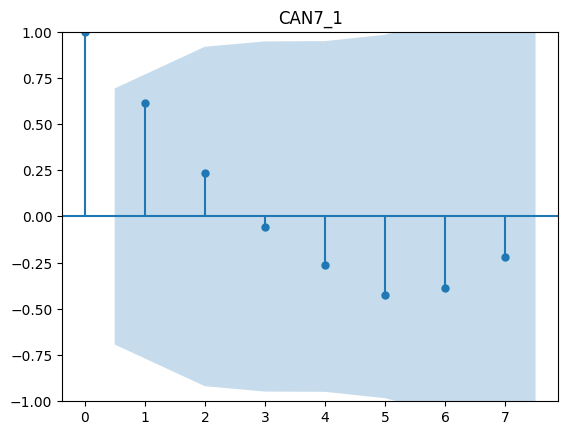

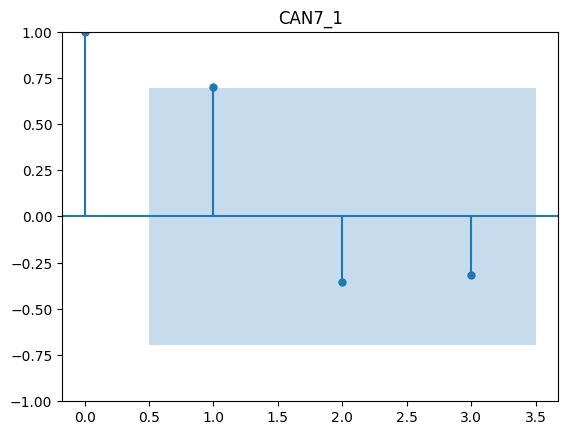

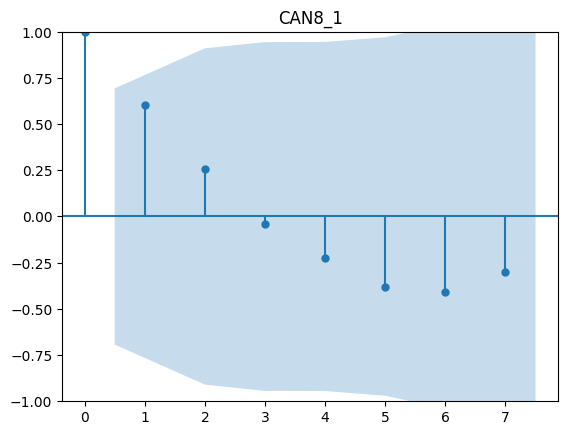

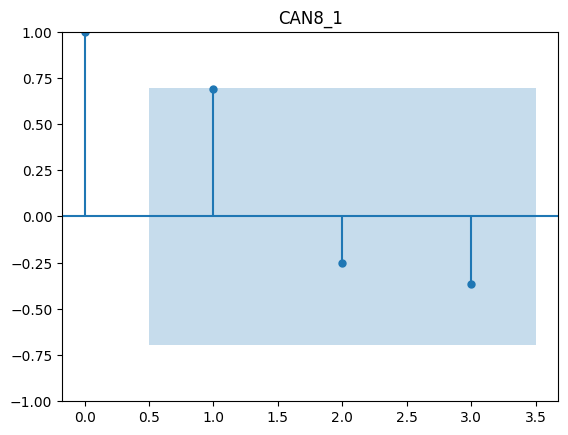

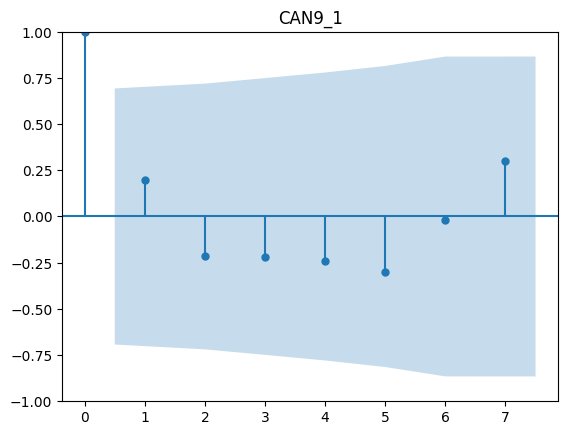

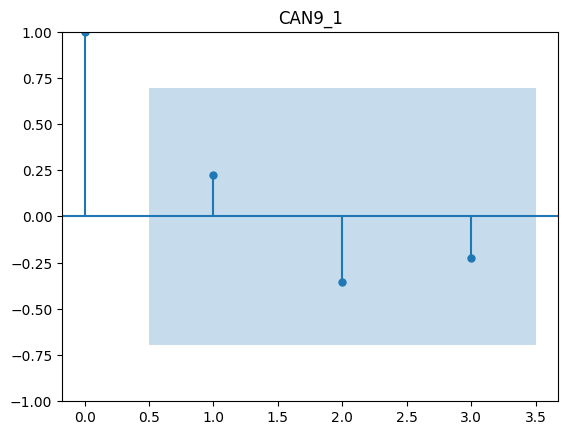

In [19]:
for i in cal.columns: 
    plot_acf(tex[i], title = i)
    plot_pacf(tex[i], lags = 3, title = i)
    plt.show()

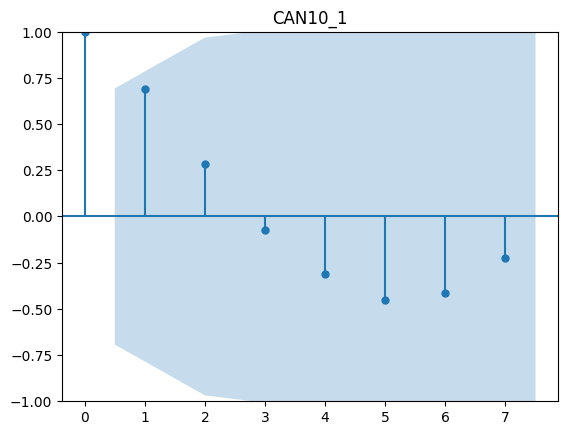

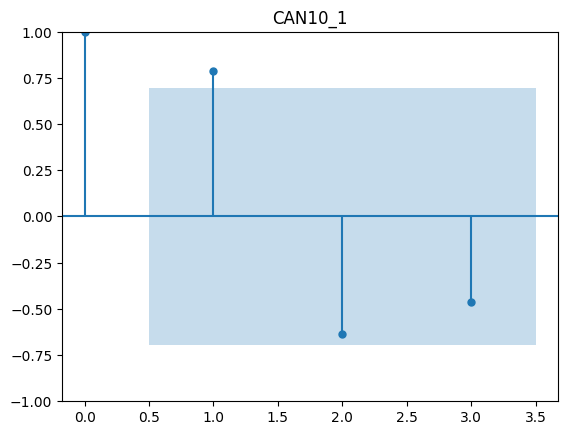

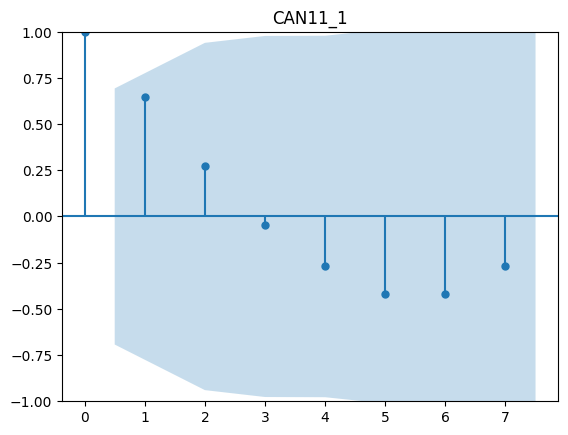

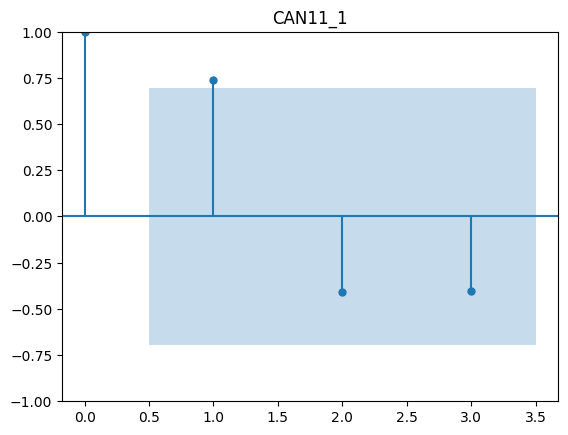

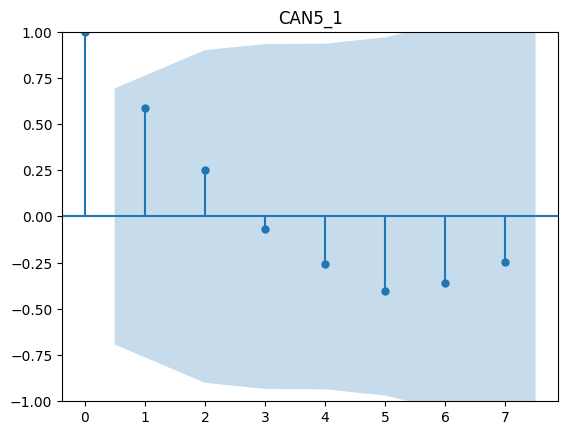

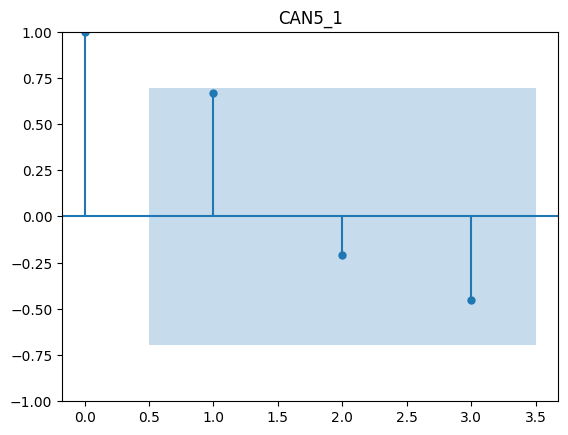

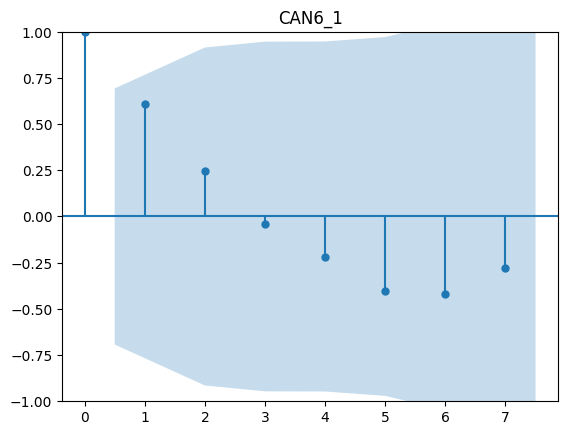

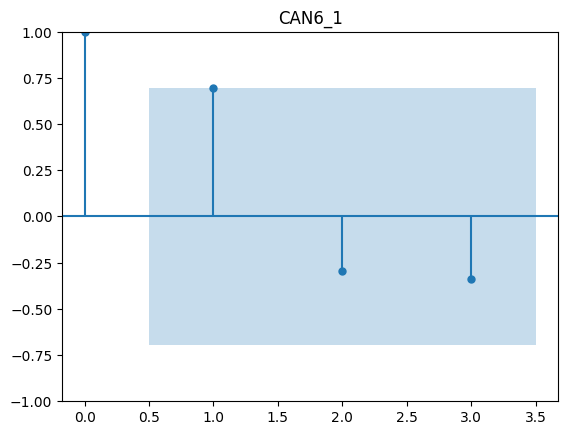

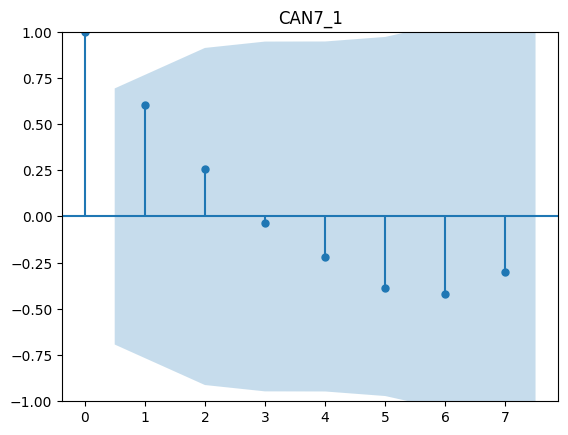

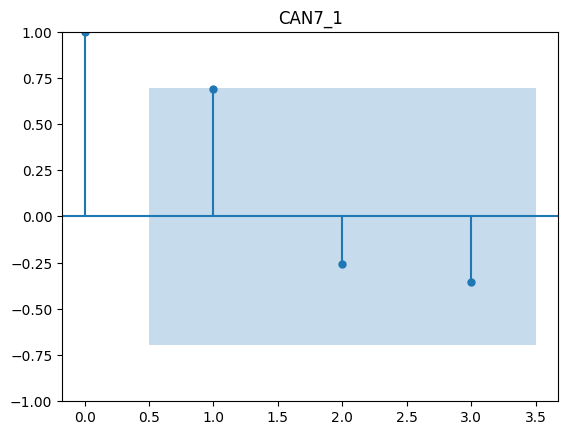

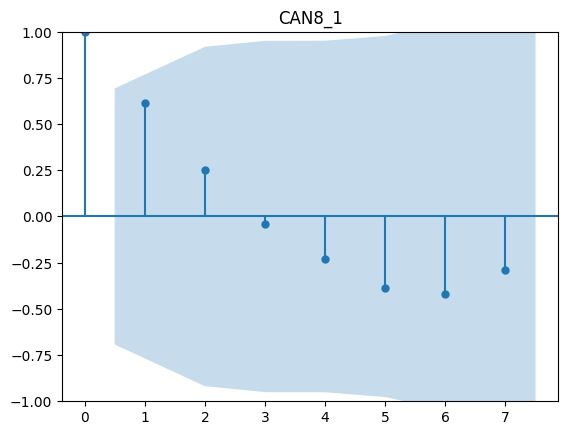

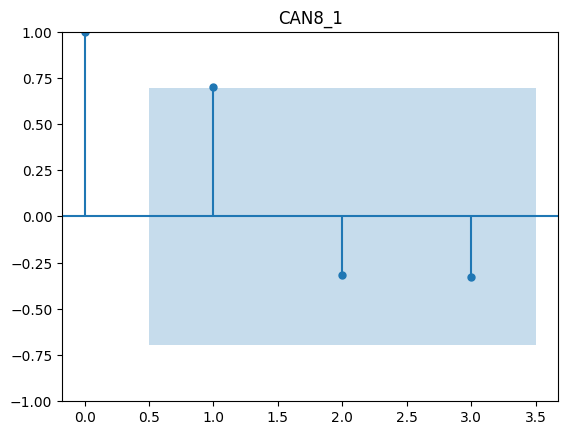

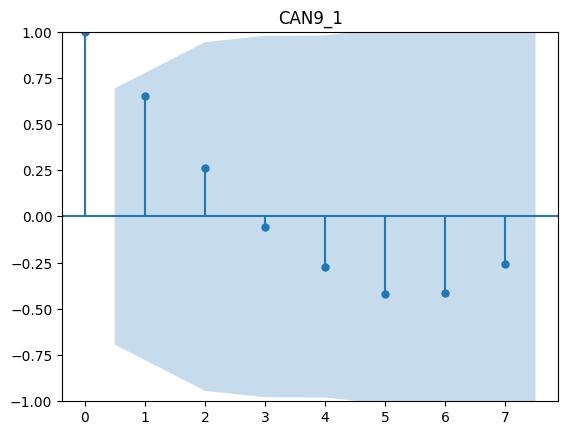

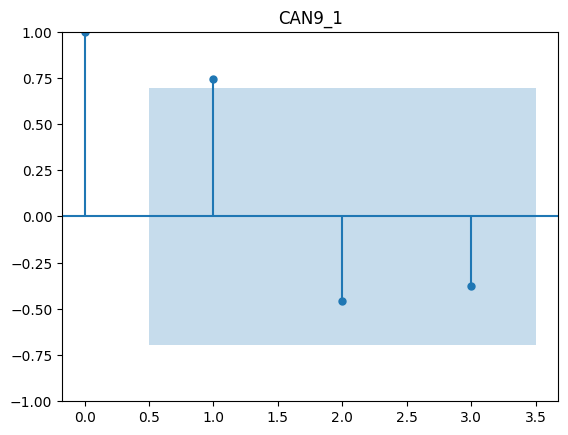

In [20]:
for i in cal.columns: 
    plot_acf(cal[i], title = i)
    plot_pacf(cal[i], lags = 3, title = i)
    plt.show()

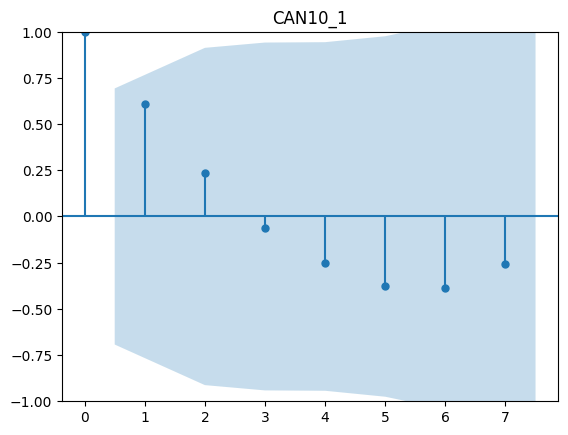

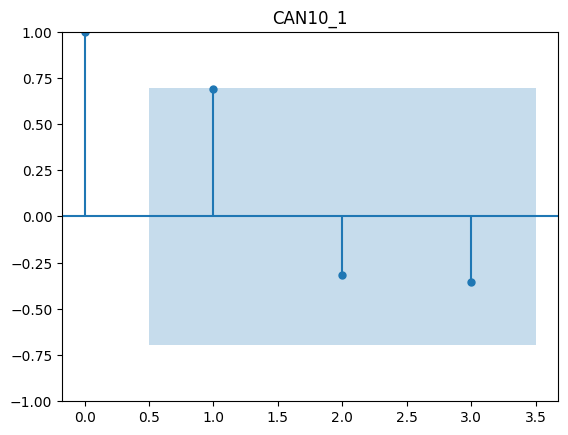

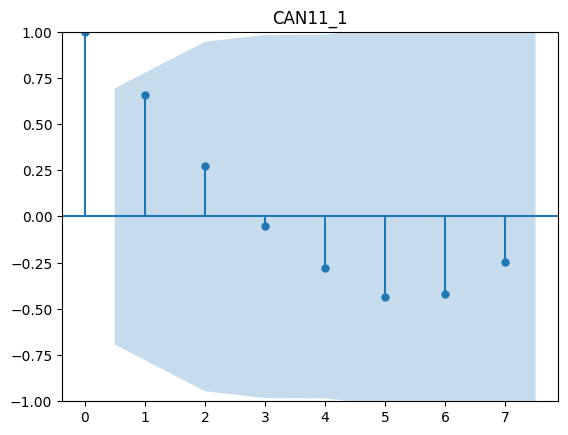

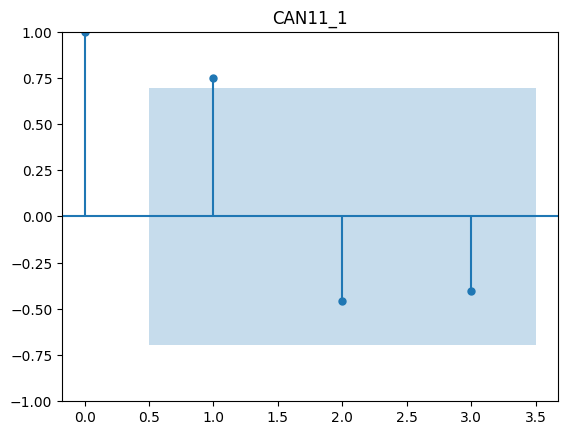

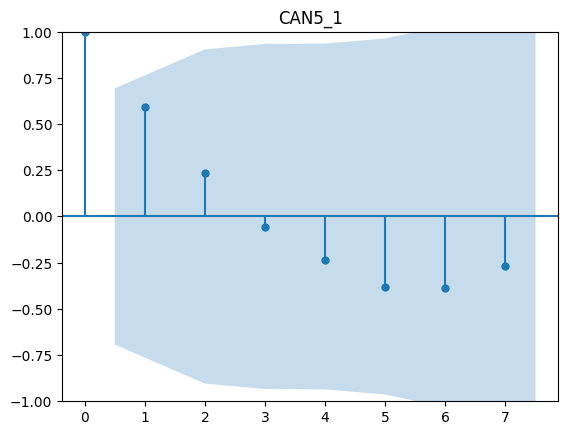

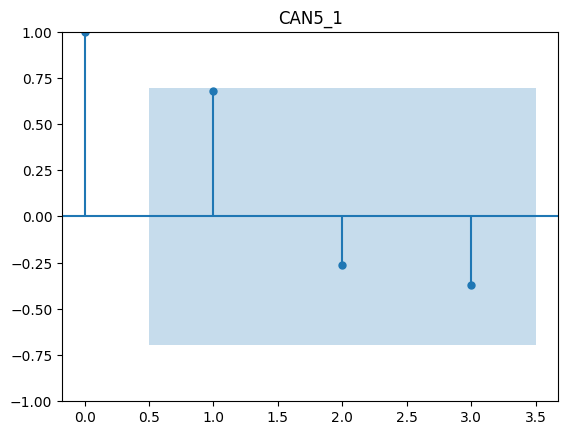

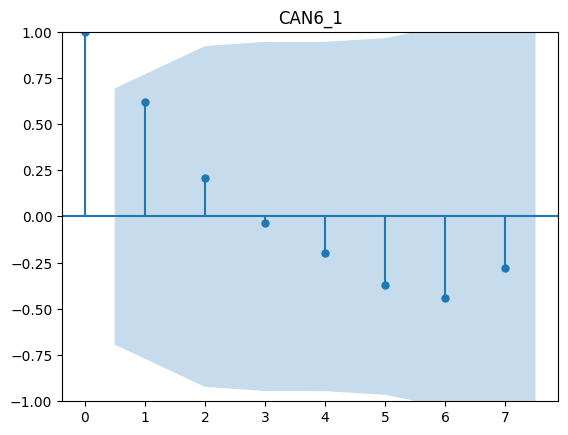

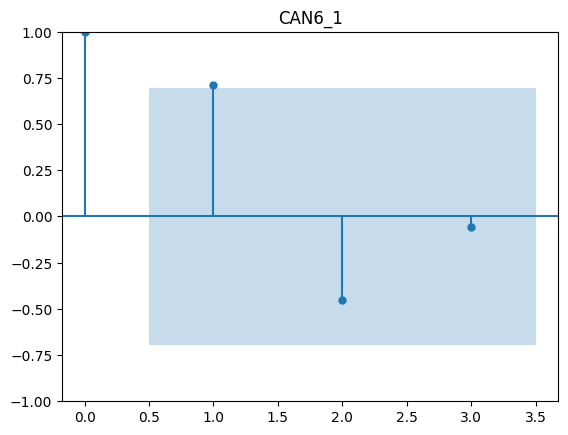

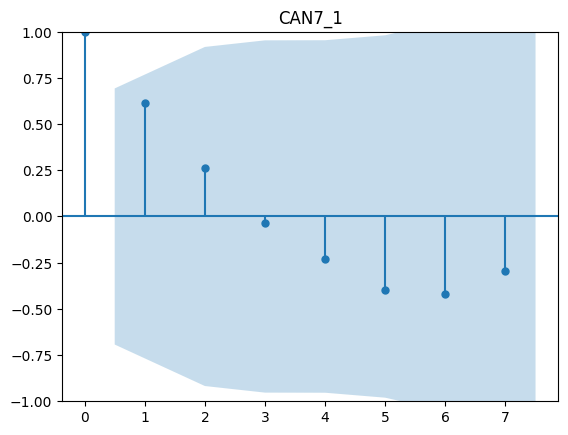

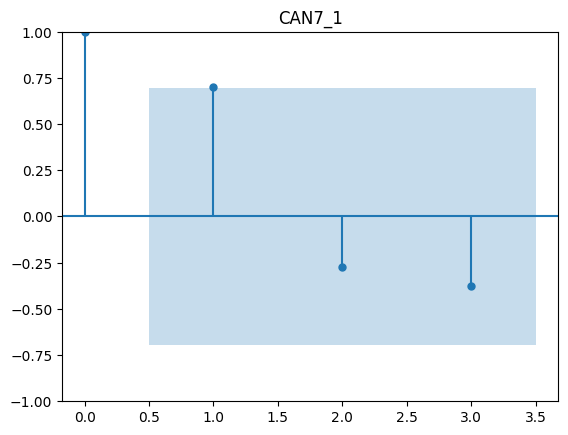

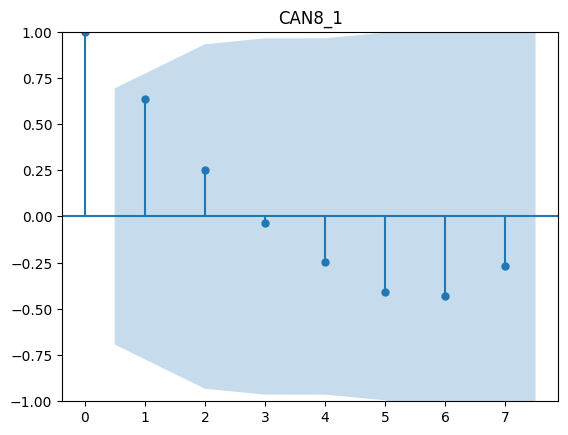

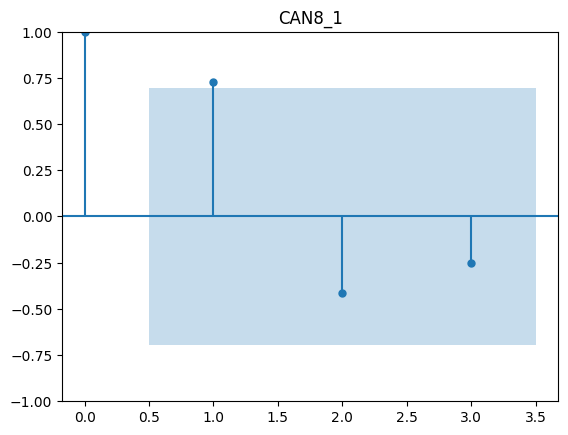

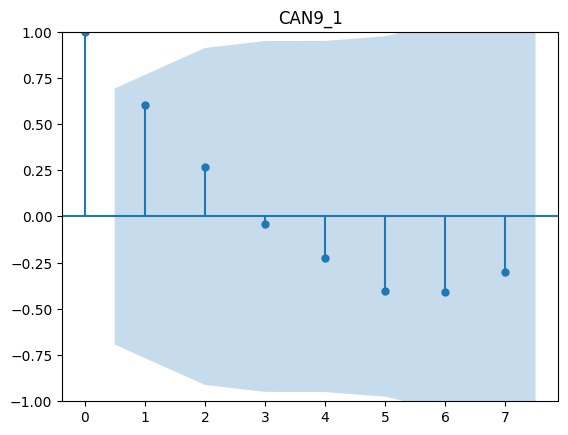

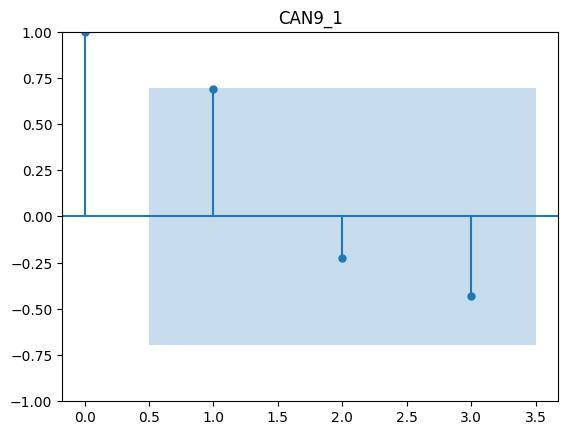

In [21]:
for i in ny.columns: 
    plot_acf(ny[i], title = i)
    plot_pacf(ny[i], lags = 3, title = i)
    plt.show()

In [ ]:
for column in cal.columns:
    # Fit an ARIMA model using the auto_arima function
    model = auto_arima(cal[column], seasonal=False, suppress_warnings=True)
    print(f'Column: {column}, ARIMA Model: {model.order}')
    forecast = model.predict(n_periods=3)
    print(f"Predictions for \n{column}: {forecast}")
    # Get the MAE 
    print('MAE: ',mean_absolute_error(cal1[column][-4:-1], forecast))
 
    # Get the MSE 
    print('MSE: ',mean_squared_error(cal1[column][-4:-1], forecast))

    print('R squered: ',r2_score(cal1[column][-4:-1], forecast))

In [22]:
cal1

,CAN10_1,CAN11_1,CAN5_1,CAN6_1,CAN7_1,CAN8_1,CAN9_1
Year,,,,,,,
2008,10.450000,119.550000,125.950000,7.750000,39.600000,47.350000,19.800000
2009,10.450000,116.175000,126.000000,7.650000,38.925000,46.800000,19.900000
2010,10.483333,112.416667,126.016667,7.566667,38.433333,46.183333,20.133333
2011,10.525000,108.812500,126.387500,7.500000,38.037500,45.662500,20.387500
2012,10.560000,105.380000,126.610000,7.470000,37.720000,45.230000,20.620000
2013,10.610000,99.530000,127.020000,7.380000,37.000000,44.310000,21.020000
2014,10.650000,94.830000,127.450000,7.330000,36.500000,43.440000,21.410000
2015,10.670000,92.110000,128.110000,7.310000,36.080000,42.670000,21.670000
2016,10.675000,90.637500,128.262500,7.312500,35.887500,42.312500,21.800000


In [23]:
for column in tex.columns:
    # Fit an ARIMA model using the auto_arima function
    model = auto_arima(tex[column], seasonal=False, error_action="ignore")
    print(f'Column: {column}, ARIMA Model: {model.order}')
    forecast = model.predict(n_periods=3)
    print(f"Predictions for {column}: {forecast}")
    
    # Get the MAE 
    print('MAE: ',mean_absolute_error(tex1[column][-4:-1], forecast))
 
    # Get the MSE 
    print('MSE: ',mean_squared_error(tex1[column][-4:-1], forecast))

    print('R squered: ',r2_score(tex1[column][-4:-1], forecast))

Column: CAN10_1, ARIMA Model: (2, 0, 0)
Predictions for CAN10_1: [11.37943967 11.38687634 11.32326174]
MAE:  0.0661560852771738
MSE:  0.008066304931600014
R squered:  -2.822278314937409
Column: CAN11_1, ARIMA Model: (2, 0, 0)
Predictions for CAN11_1: [ 98.78678318 101.74793814 105.02955176]
MAE:  3.293646581945083
MSE:  12.494493154254181
R squered:  -6.761373087758219
Column: CAN5_1, ARIMA Model: (1, 0, 1)
Predictions for CAN5_1: [117.99726149 117.9949134  117.99256536]
MAE:  0.6171497982018508
MSE:  0.5962305691085021
R squered:  -0.7449862643164806
Column: CAN6_1, ARIMA Model: (1, 0, 1)
Predictions for CAN6_1: [9.27948824 9.27946018 9.27943212]
MAE:  0.024706487077424438
MSE:  0.0008541681739991599
R squered:  -2.514291915882372
Column: CAN7_1, ARIMA Model: (2, 0, 0)
Predictions for CAN7_1: [37.966011   38.21953667 38.43651069]
MAE:  0.3087416754827146
MSE:  0.10474663634721748
R squered:  -10.00540257040916
Column: CAN8_1, ARIMA Model: (2, 0, 0)
Predictions for CAN8_1: [49.24114241

In [24]:
for column in ny.columns:
    # Fit an ARIMA model using the auto_arima function
    model = auto_arima(ny[column], seasonal=False, suppress_warnings=True)
    print(f'Column: {column}, ARIMA Model: {model.order}')
    forecast = model.predict(n_periods=3)
    print(f"Predictions for {column}: {forecast}")
    # Get the MAE 
    print('MAE: ',mean_absolute_error(ny1[column][-4:-1], forecast))
 
    # Get the MSE 
    print('MSE: ',mean_squared_error(ny1[column][-4:-1], forecast))

    print('R squered: ',r2_score(ny1[column][-4:-1], forecast))

Column: CAN10_1, ARIMA Model: (2, 0, 0)
Predictions for CAN10_1: [12.53720211 12.74937643 12.92588062]
MAE:  0.17776416144896423
MSE:  0.035421483494765114
R squered:  -2.758186050693024
Column: CAN11_1, ARIMA Model: (2, 0, 0)
Predictions for CAN11_1: [141.66948396 144.56390946 148.26701668]
MAE:  3.6431922546872215
MSE:  15.416886793329157
R squered:  -9.050521147873015
Column: CAN5_1, ARIMA Model: (2, 0, 1)
Predictions for CAN5_1: [149.14137401 150.82262909 152.40875814]
MAE:  1.663142635212618
MSE:  3.0340381865224564
R squered:  -3.5405467548881076
Column: CAN6_1, ARIMA Model: (2, 0, 1)
Predictions for CAN6_1: [8.09664763 8.12620067 8.15687587]
MAE:  0.061296945603728524
MSE:  0.006437511106417442
R squered:  -6.908070515561114
Column: CAN7_1, ARIMA Model: (1, 0, 1)
Predictions for CAN7_1: [42.08472636 42.16624785 42.24428514]
MAE:  0.17943554297556355
MSE:  0.04641571334699535
R squered:  -1.779152898946906
Column: CAN8_1, ARIMA Model: (2, 0, 0)
Predictions for CAN8_1: [65.2767702

 R-squared score to take a negative value if the model performs worse than a horizontal line (i.e., a model that simply predicts the mean value of the outcome variable for all observations). This can happen if the model is overfitting to noise in the data, or if the data is inherently noisy or unpredictable. In such cases, the negative R-squared score indicates that the model is not useful for predicting the outcome variable

Simple Exponential smoothing

In [25]:
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [26]:
# Loop over each column in the DataFrame
for column in cal.columns:
    # Get the time series data for the column
    ts = cal[column]
    
    # Find the optimal alpha value
    mse_list = []
    for alpha in range(1, 10):
        alpha_value = alpha/10.0
        model = SimpleExpSmoothing(ts).fit(smoothing_level=alpha_value)
        y_pred = model.forecast(steps=3)
        mse = mean_squared_error(cal1[column][-4:-1], y_pred)
        mse_list.append(mse)
    optimal_alpha = (mse_list.index(min(mse_list)) + 1)/10.0
    
    # Perform simple exponential smoothing with the optimal alpha value
    model = SimpleExpSmoothing(ts).fit(smoothing_level=optimal_alpha)
    y_pred = model.forecast(steps=3)
    mse = mean_squared_error(cal1[column][-4:-1], y_pred)
    Rsquared = r2_score(cal1[column][-4:-1], forecast)
    
    # Print the forecast and mean squared error for the column
    print(f"Column: {column}")
    print(f"Optimal alpha: {optimal_alpha}")
    print(f"Forecast: {y_pred}")
    print(f"Mean squared error: {mse}")
    print(f"R squared: {Rsquared}")

Column: CAN10_1
Optimal alpha: 0.8
Forecast: 8     10.663929
9     10.663929
10    10.663929
dtype: float64
Mean squared error: 0.00010802626339350288
R squared: -816457.2971102619
Column: CAN11_1
Optimal alpha: 0.9
Forecast: 8     92.435233
9     92.435233
10    92.435233
dtype: float64
Mean squared error: 4.116762841571113
R squared: -195566.42156917293
Column: CAN5_1
Optimal alpha: 0.9
Forecast: 8     128.039264
9     128.039264
10    128.039264
dtype: float64
Mean squared error: 0.2730183406391845
R squared: -268732.22988918447
Column: CAN6_1
Optimal alpha: 0.9
Forecast: 8     7.312594
9     7.312594
10    7.312594
dtype: float64
Mean squared error: 0.00010573812243314931
R squared: -4682434.1933031995
Column: CAN7_1
Optimal alpha: 0.9
Forecast: 8     36.127756
9     36.127756
10    36.127756
dtype: float64
Mean squared error: 0.19150026709299026
R squared: -12863.407374138542
Column: CAN8_1
Optimal alpha: 0.9
Forecast: 8     42.756669
9     42.756669
10    42.756669
dtype: float64

In [27]:
# Loop over each column in the DataFrame
for column in tex.columns:
    # Get the time series data for the column
    ts = tex[column]
    
    # Find the optimal alpha value
    mse_list = []
    for alpha in range(1, 10):
        alpha_value = alpha/10.0
        model = SimpleExpSmoothing(ts).fit(smoothing_level=alpha_value)
        y_pred = model.forecast(steps=3)
        mse = mean_squared_error(tex1[column][-4:-1], y_pred)
        mse_list.append(mse)
    optimal_alpha = (mse_list.index(min(mse_list)) + 1)/10.0
    
    # Perform simple exponential smoothing with the optimal alpha value
    model = SimpleExpSmoothing(ts).fit(smoothing_level=optimal_alpha)
    y_pred = model.forecast(steps=3)
    mse = mean_squared_error(tex1[column][-4:-1], y_pred)
    Rsquared = r2_score(tex1[column][-4:-1], forecast)
    
    # Print the forecast and mean squared error for the column
    print(f"Column: {column}")
    print(f"Optimal alpha: {optimal_alpha}")
    print(f"Forecast: {y_pred}")
    print(f"Mean squared error: {mse}")
    print(f"R squared: {Rsquared}")

Column: CAN10_1
Optimal alpha: 0.9
Forecast: 8     11.284251
9     11.284251
10    11.284251
dtype: float64
Mean squared error: 0.020014126368647026
R squared: -35345.319120574335
Column: CAN11_1
Optimal alpha: 0.3
Forecast: 8     99.047116
9     99.047116
10    99.047116
dtype: float64
Mean squared error: 1.8460314228778145
R squared: -3828.371588847962
Column: CAN5_1
Optimal alpha: 0.9
Forecast: 8     117.161325
9     117.161325
10    117.161325
dtype: float64
Mean squared error: 2.126302819221308
R squared: -28362.16892572757
Column: CAN6_1
Optimal alpha: 0.9
Forecast: 8     9.266799
9     9.266799
10    9.266799
dtype: float64
Mean squared error: 0.0016393754622529468
R squared: -475523.80853387015
Column: CAN7_1
Optimal alpha: 0.3
Forecast: 8     37.912363
9     37.912363
10    37.912363
dtype: float64
Mean squared error: 0.009706855242932496
R squared: -33453.29350139329
Column: CAN8_1
Optimal alpha: 0.9
Forecast: 8     50.132995
9     50.132995
10    50.132995
dtype: float64
Mea

In [28]:
# Loop over each column in the DataFrame
for column in ny.columns:
    # Get the time series data for the column
    ts = ny[column]
    
    # Find the optimal alpha value
    mse_list = []
    for alpha in range(1, 10):
        alpha_value = alpha/10.0
        model = SimpleExpSmoothing(ts).fit(smoothing_level=alpha_value)
        y_pred = model.forecast(steps=3)
        mse = mean_squared_error(ny1[column][-4:-1], y_pred)
        mse_list.append(mse)
    optimal_alpha = (mse_list.index(min(mse_list)) + 1)/10.0
    
    # Perform simple exponential smoothing with the optimal alpha value
    model = SimpleExpSmoothing(ts).fit(smoothing_level=optimal_alpha)
    y_pred = model.forecast(steps=3)
    mse = mean_squared_error(ny1[column][-4:-1], y_pred)
    Rsquared = r2_score(ny1[column][-4:-1], forecast)
    
    # Print the forecast and mean squared error for the column
    print(f"Column: {column}")
    print(f"Optimal alpha: {optimal_alpha}")
    print(f"Forecast: {y_pred}")
    print(f"Mean squared error: {mse}")
    print(f"R squared: {Rsquared}")

Column: CAN10_1
Optimal alpha: 0.9
Forecast: 8     12.272367
9     12.272367
10    12.272367
dtype: float64
Mean squared error: 0.09199789354381392
R squared: -5958.9003760397145
Column: CAN11_1
Optimal alpha: 0.6
Forecast: 8     140.920004
9     140.920004
10    140.920004
dtype: float64
Mean squared error: 1.606987062850888
R squared: -9565.971656552623
Column: CAN5_1
Optimal alpha: 0.9
Forecast: 8     147.150117
9     147.150117
10    147.150117
dtype: float64
Mean squared error: 4.579353598638293
R squared: -24931.88768160866
Column: CAN6_1
Optimal alpha: 0.9
Forecast: 8     8.082422
9     8.082422
10    8.082422
dtype: float64
Mean squared error: 0.0011079667929199003
R squared: -176598.63186431912
Column: CAN7_1
Optimal alpha: 0.9
Forecast: 8     42.405699
9     42.405699
10    42.405699
dtype: float64
Mean squared error: 0.12883651197876597
R squared: -29024.615688577003
Column: CAN8_1
Optimal alpha: 0.9
Forecast: 8     65.178763
9     65.178763
10    65.178763
dtype: float64
Me

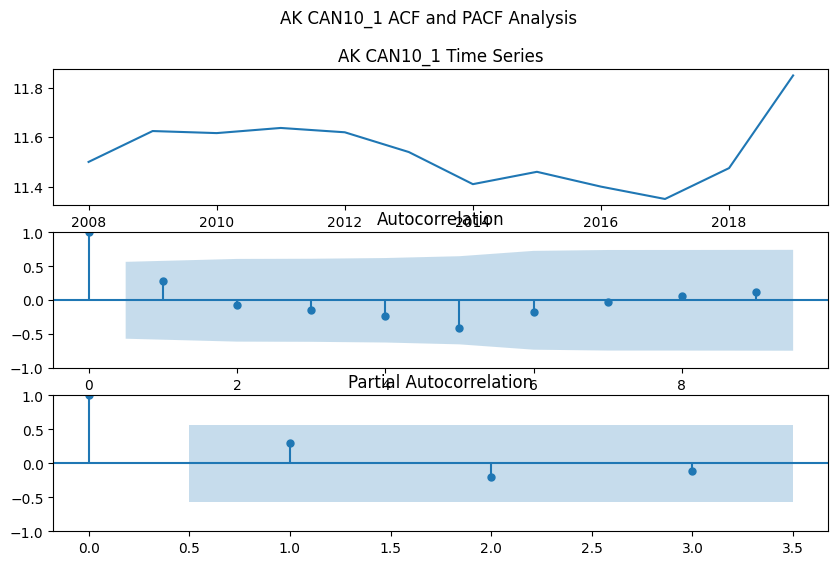

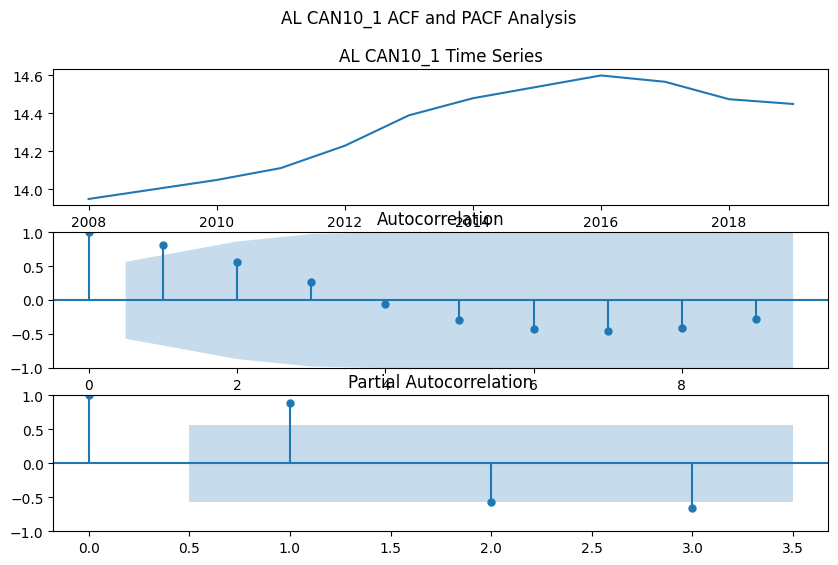

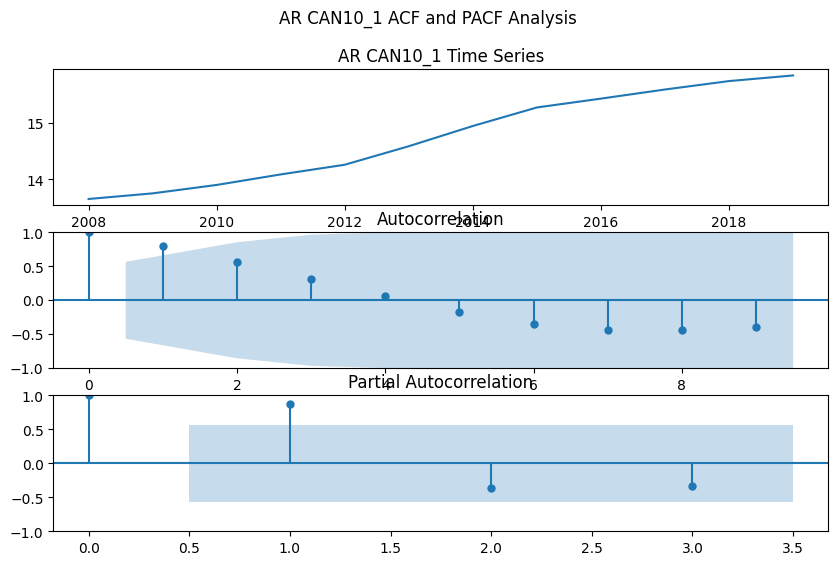

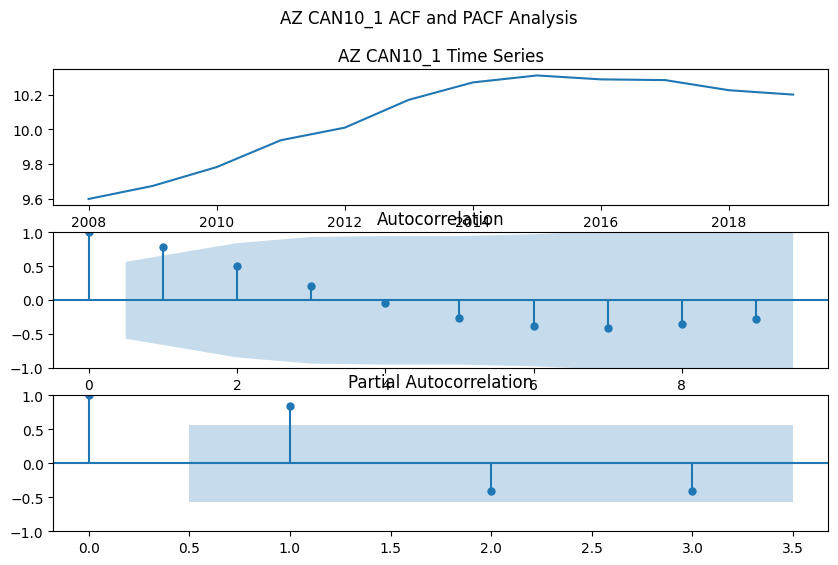

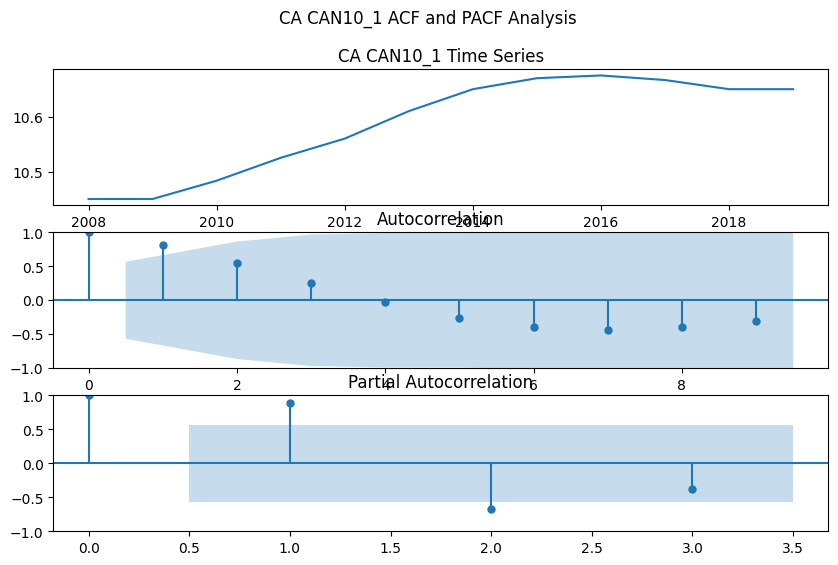

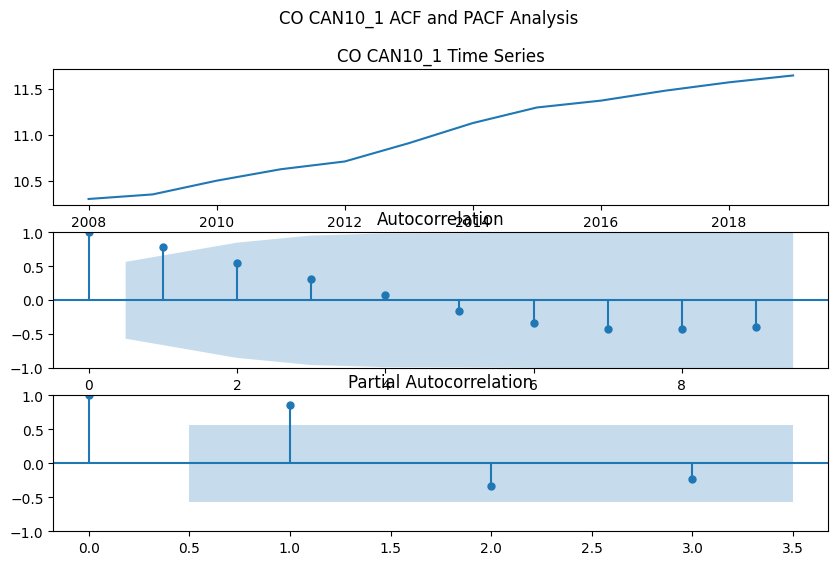

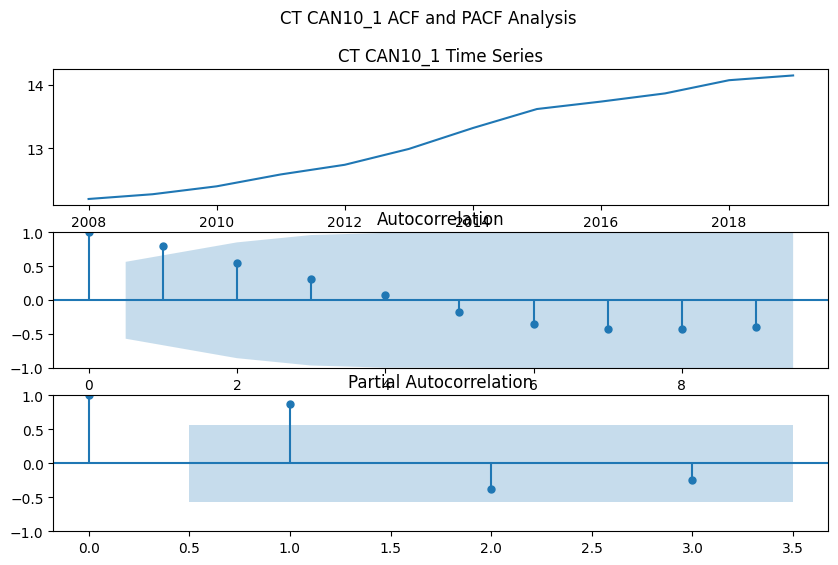

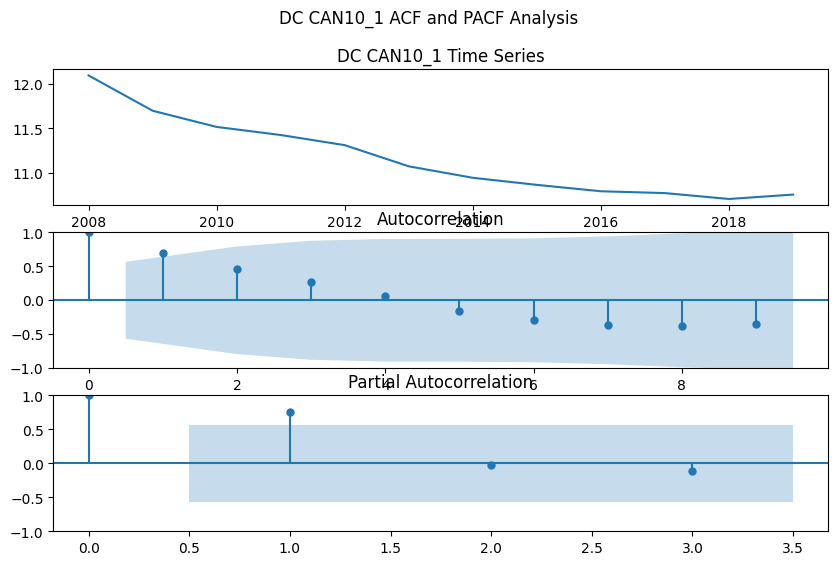

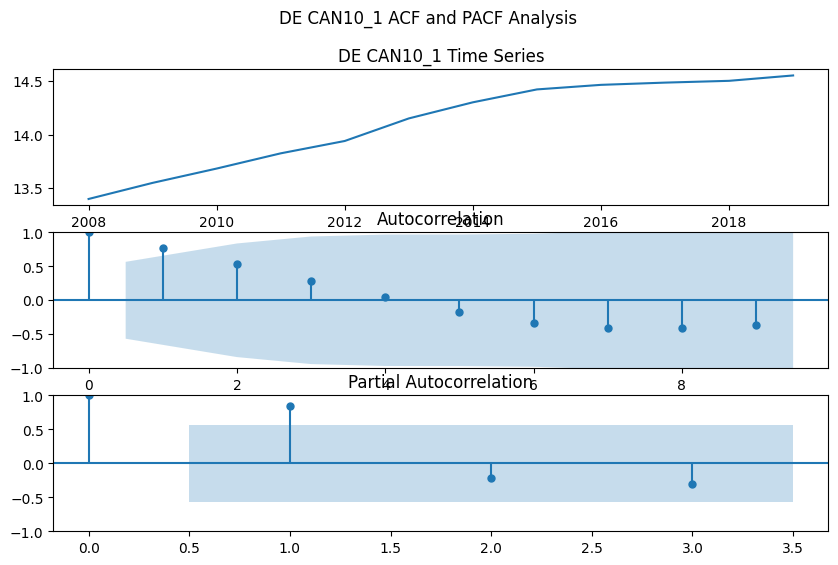

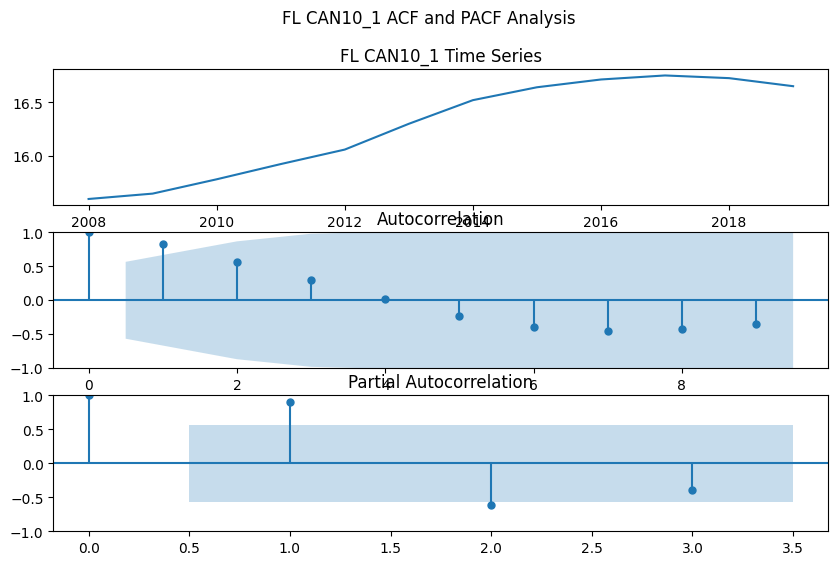

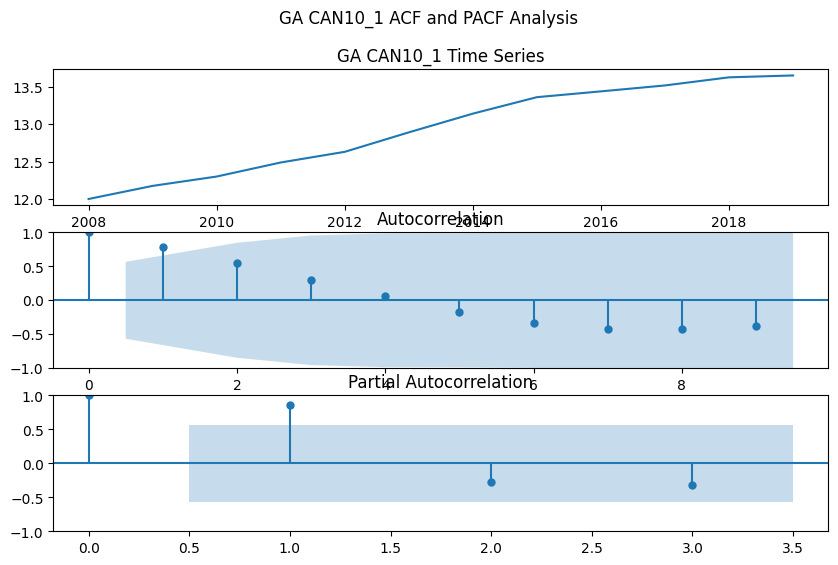

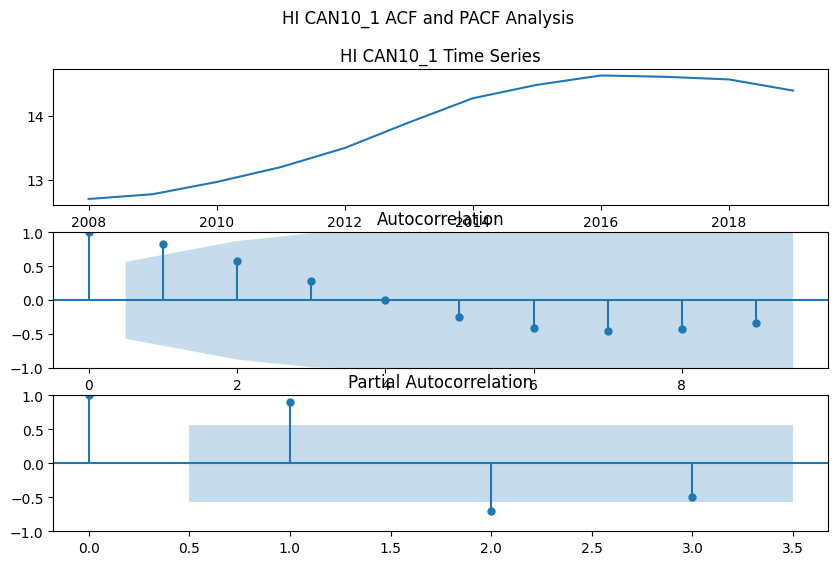

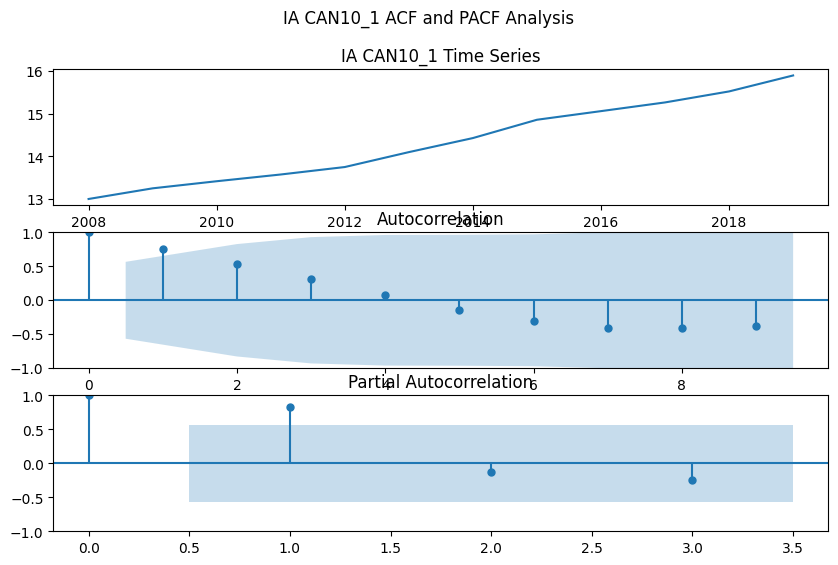

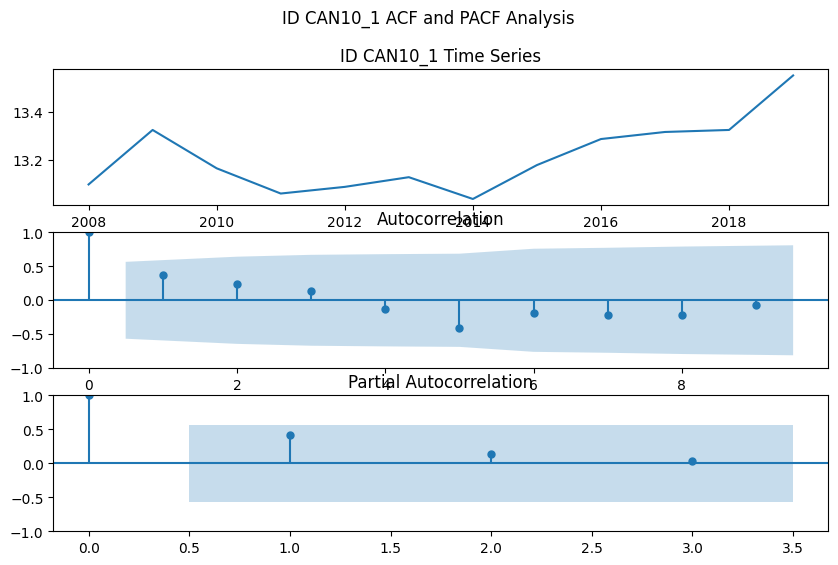

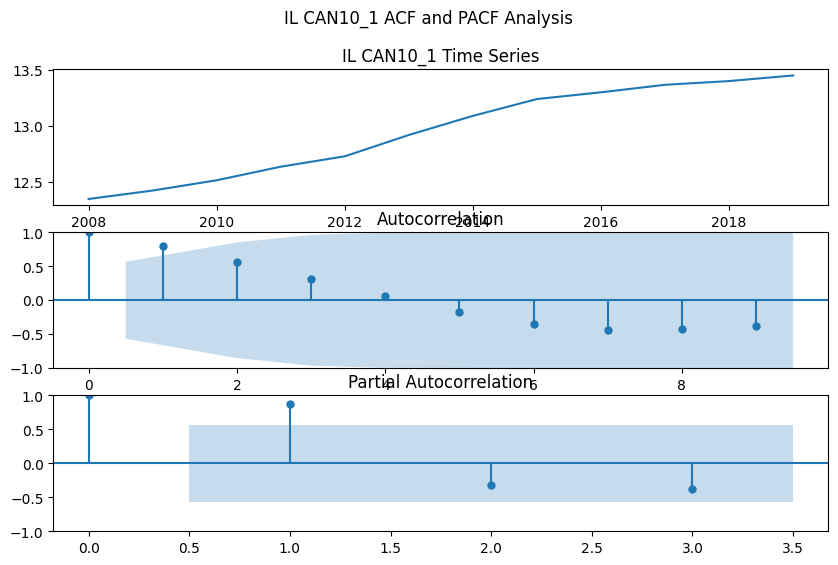

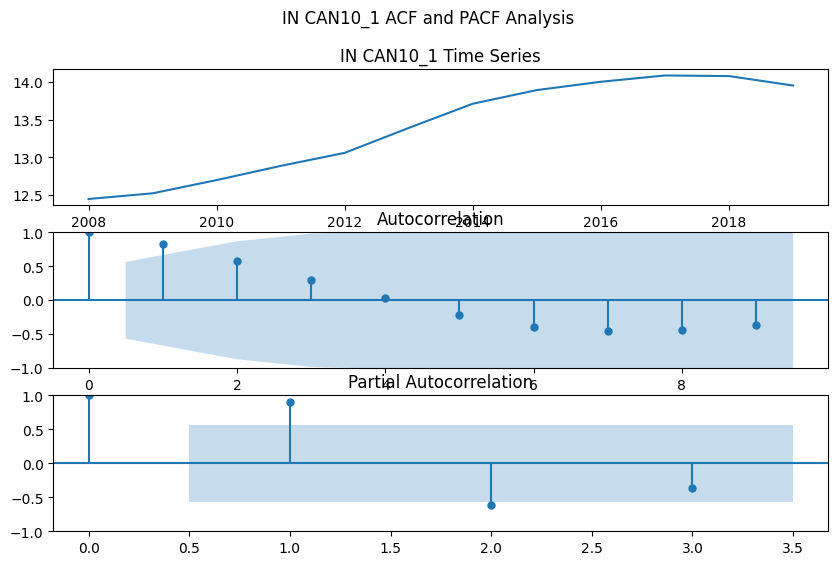

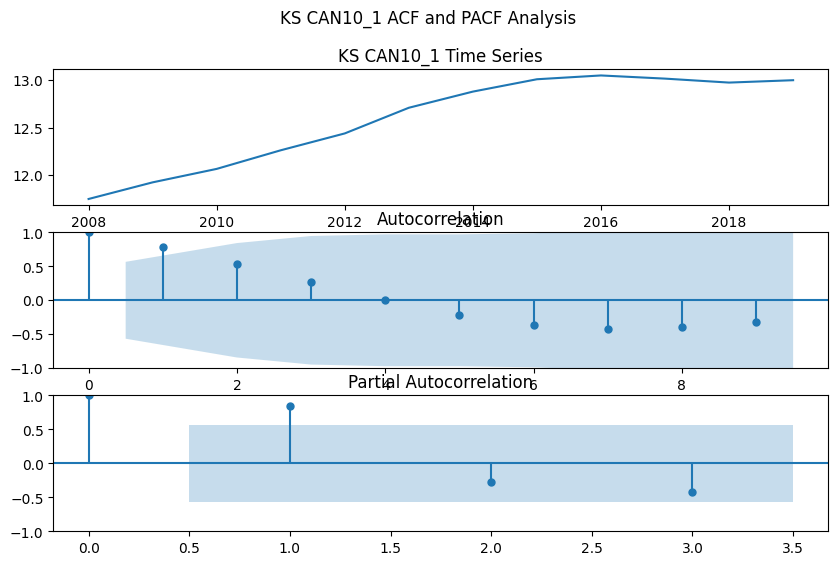

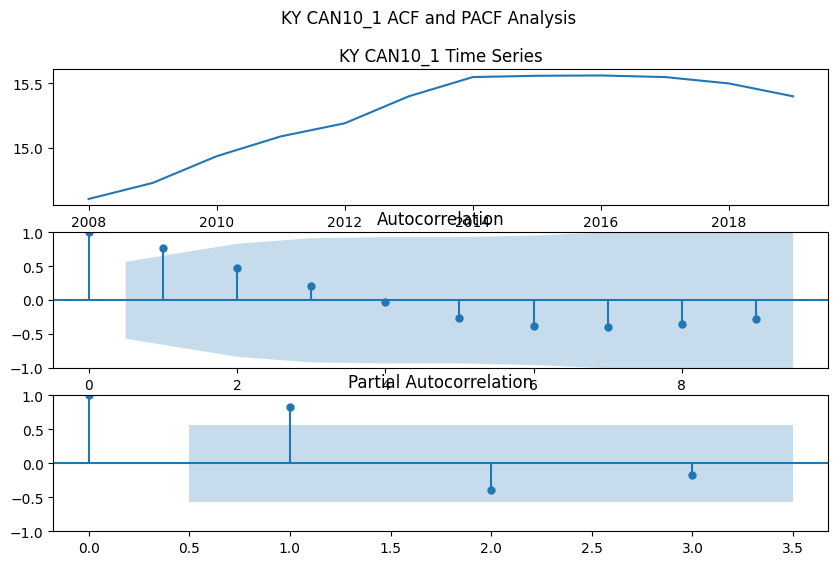

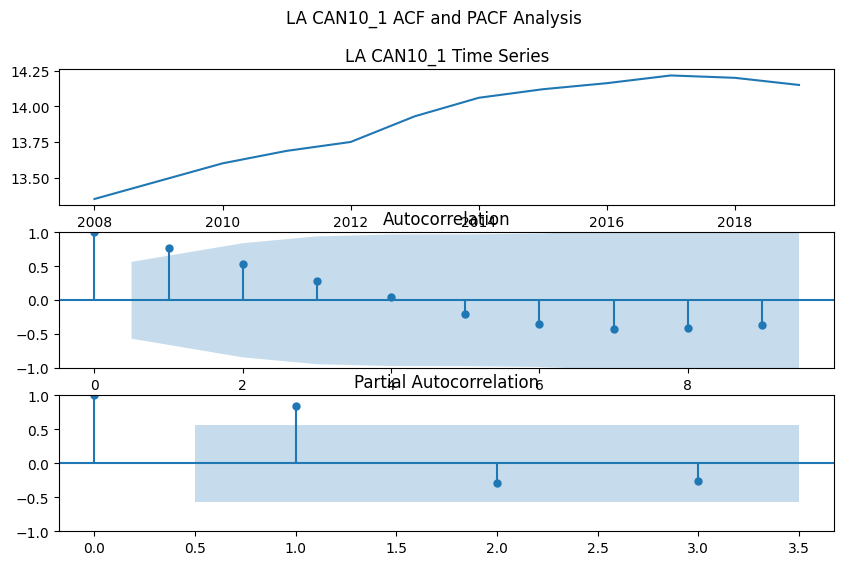

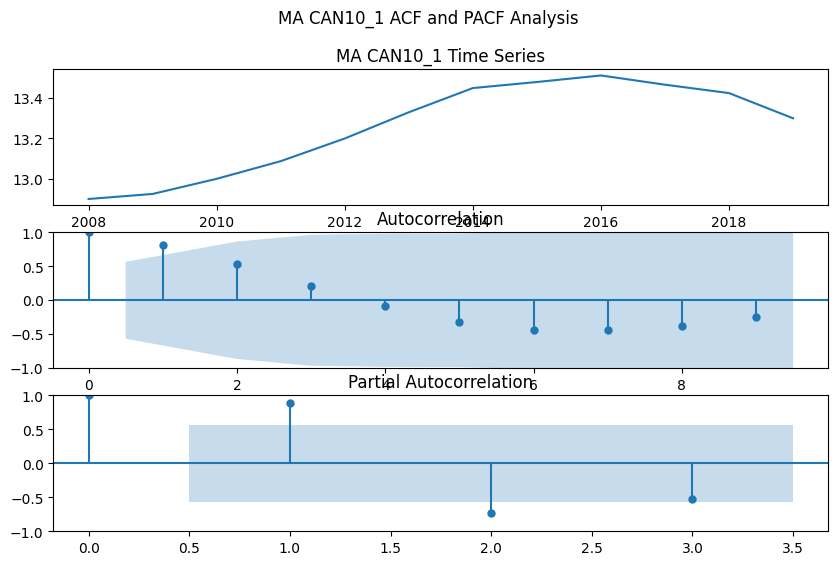

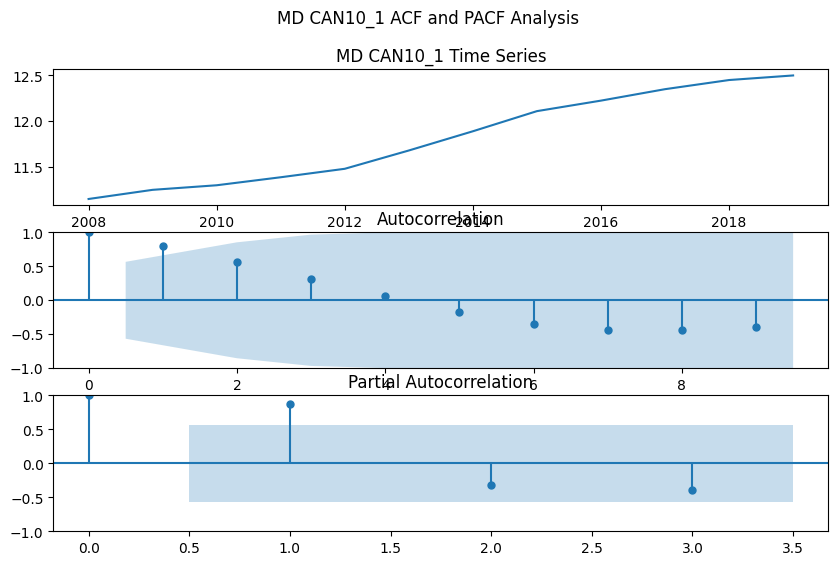

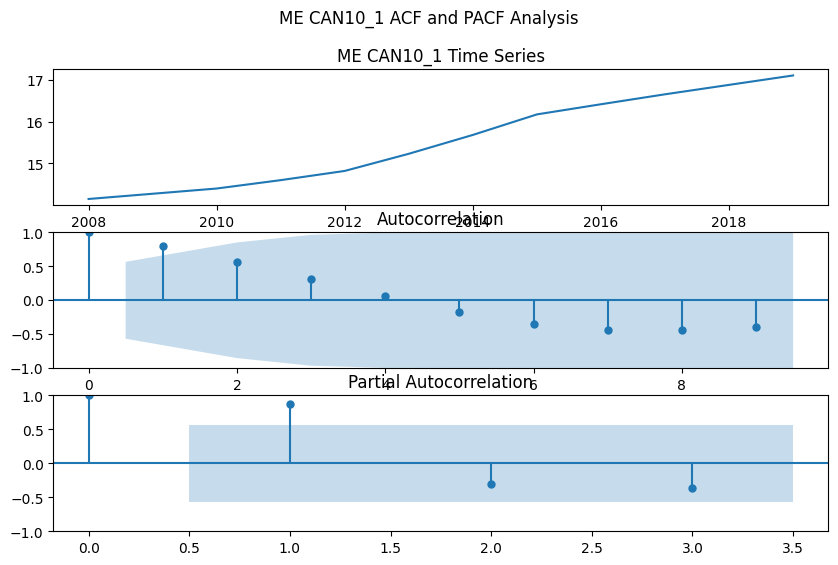

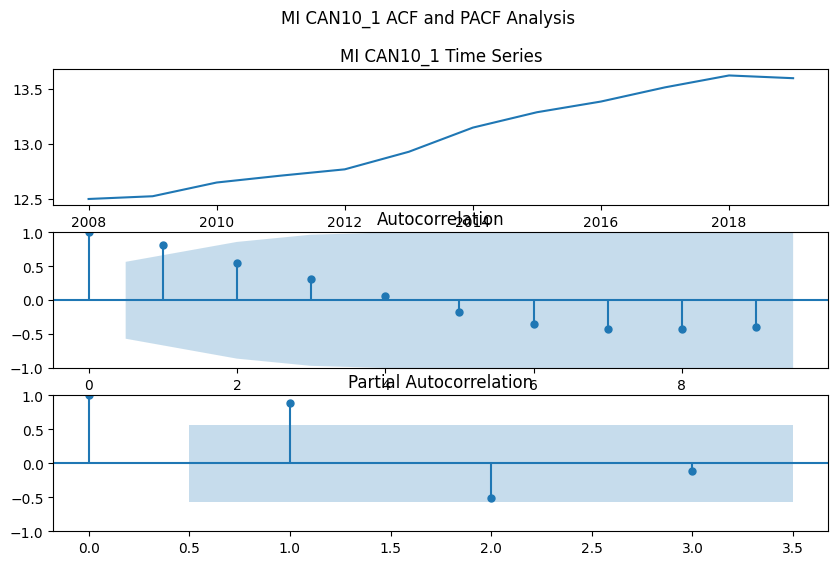

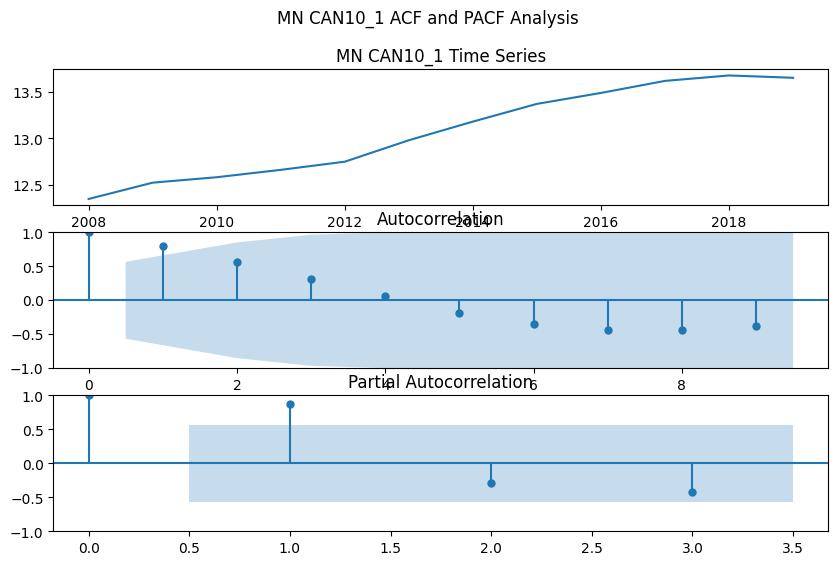

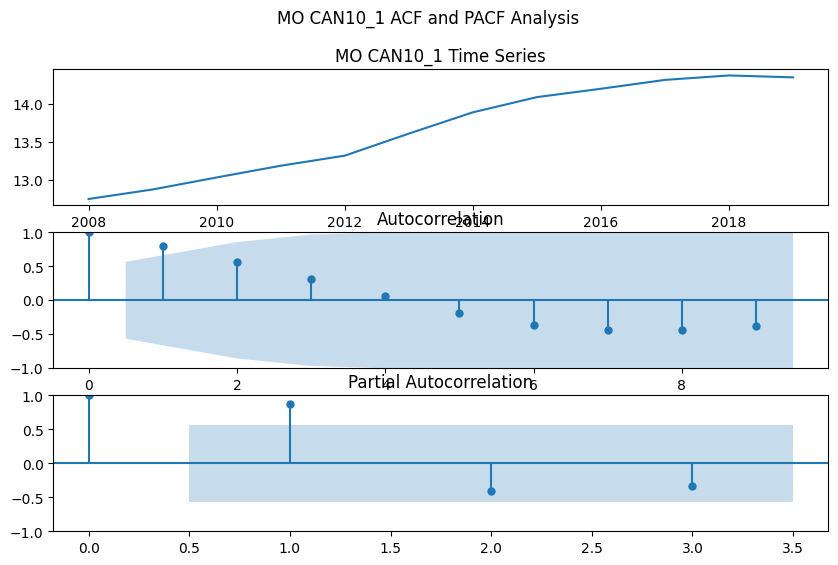

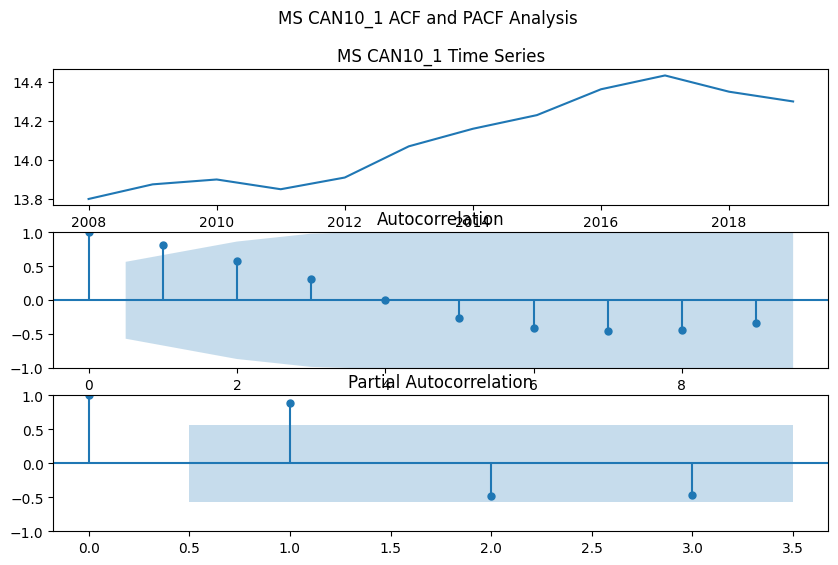

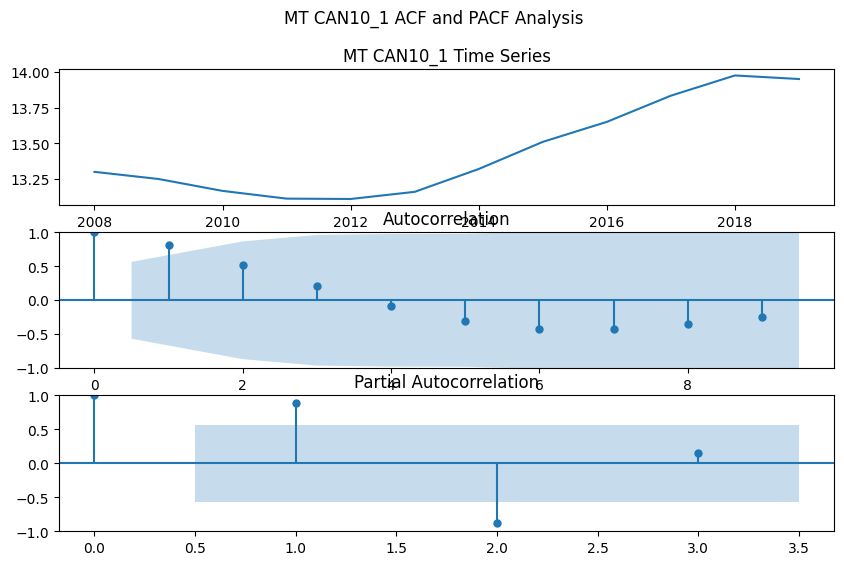

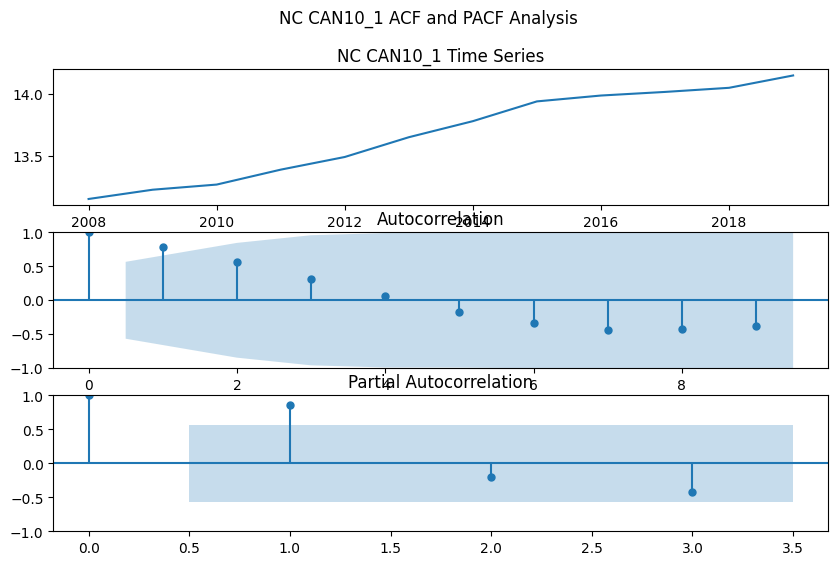

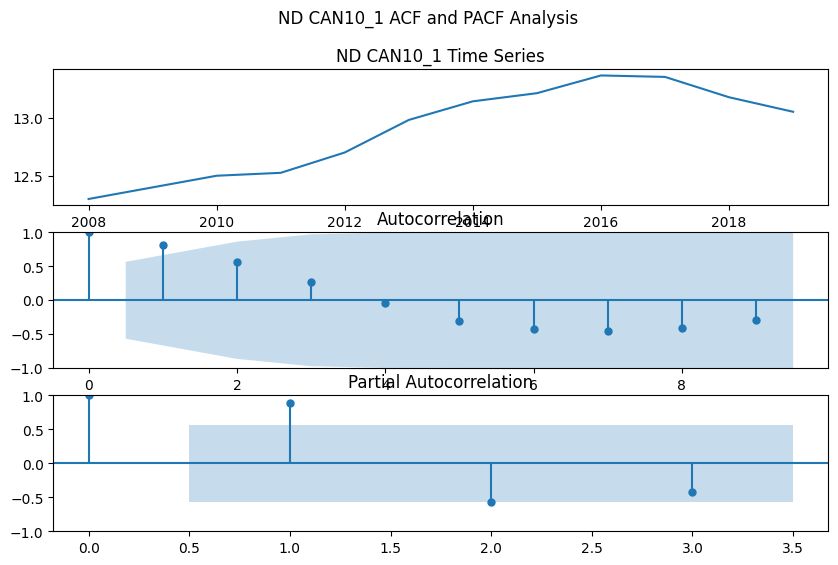

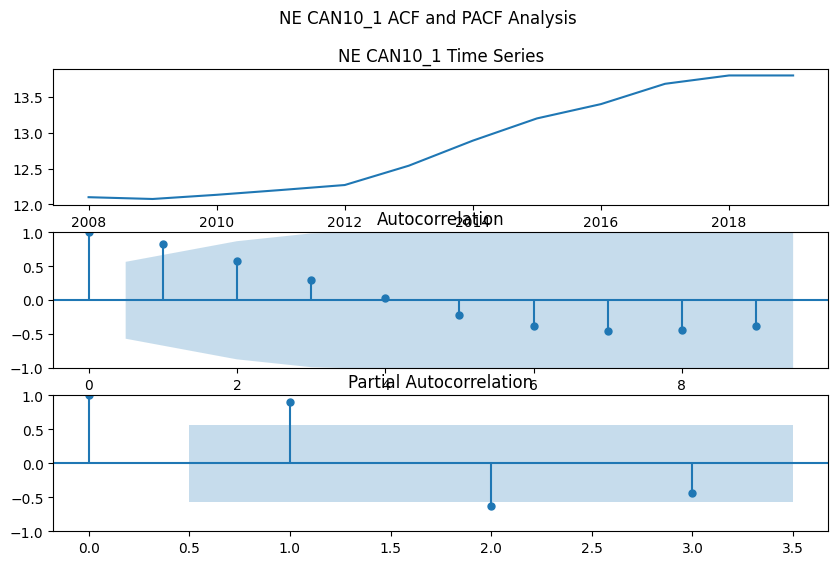

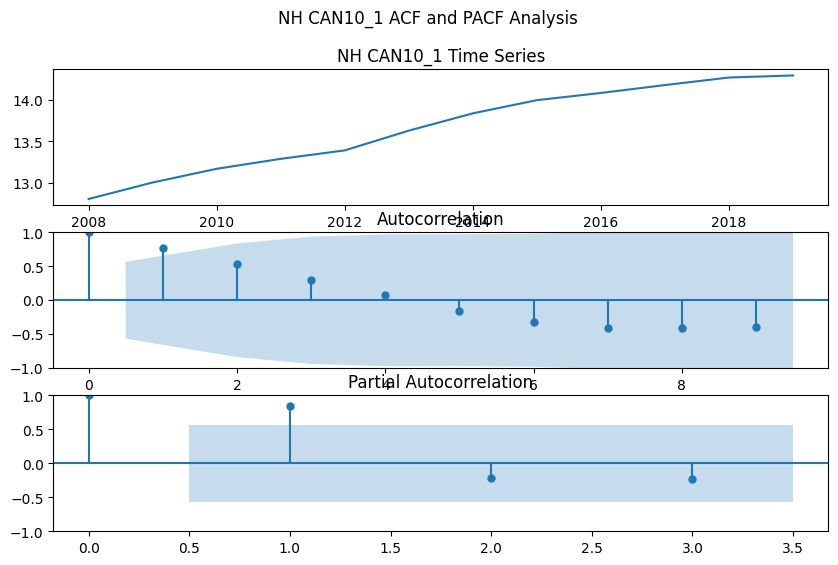

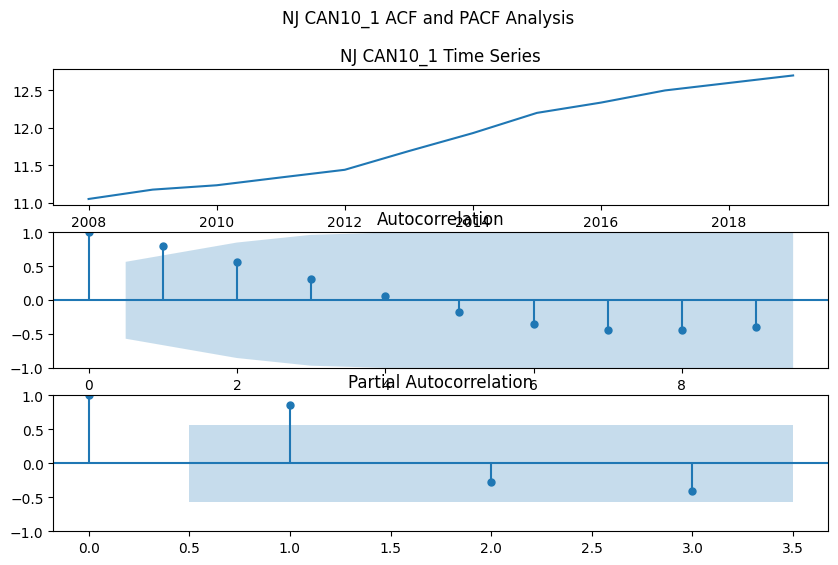

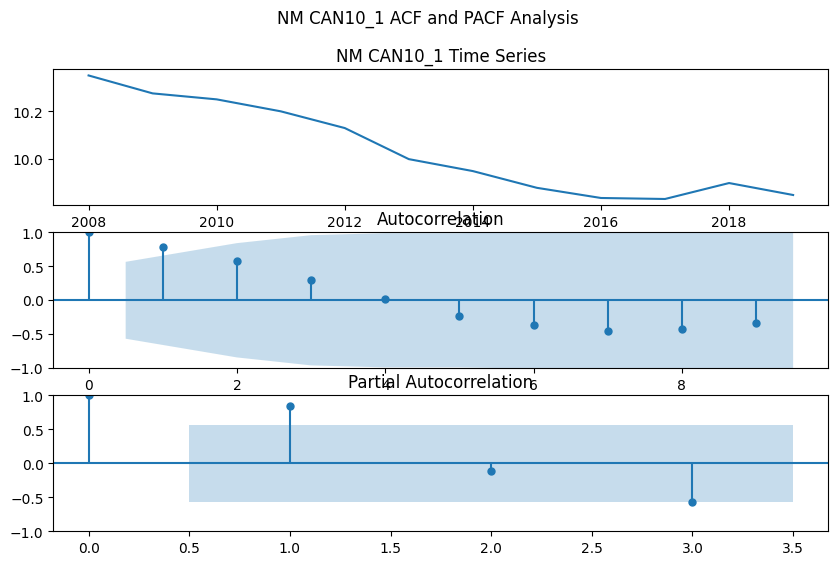

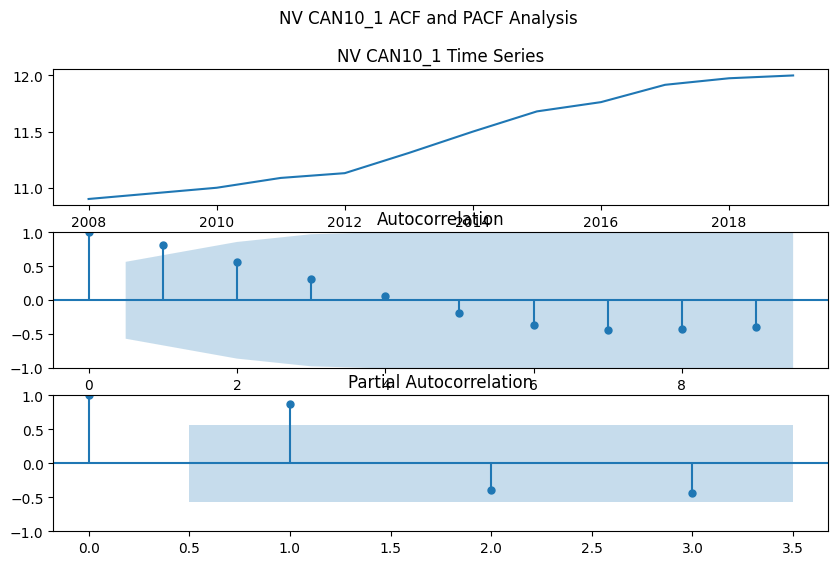

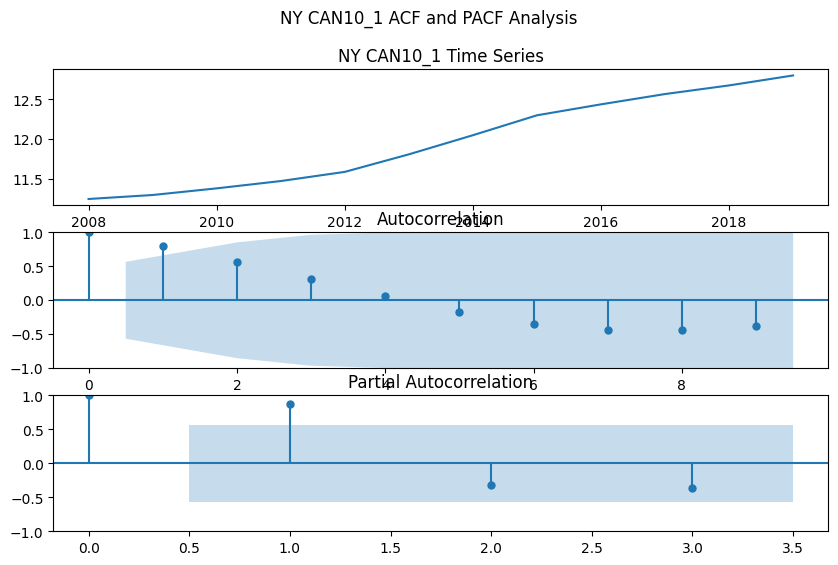

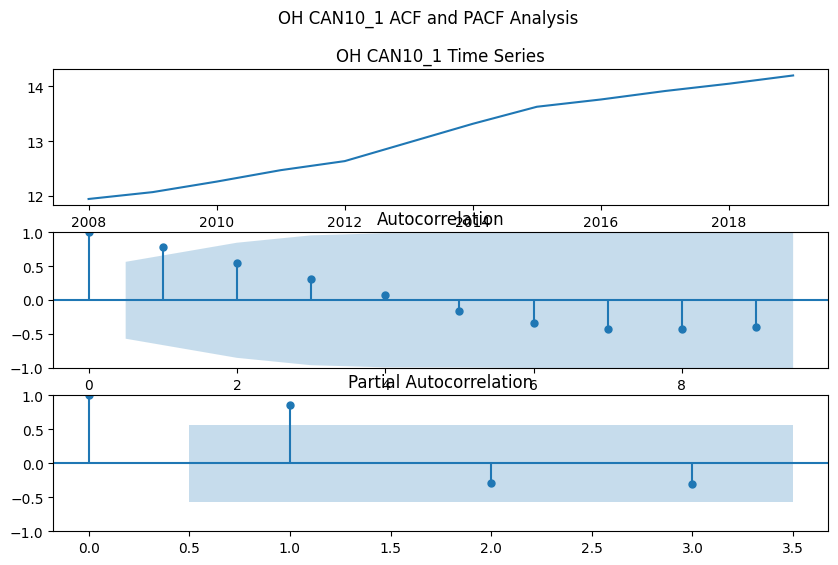

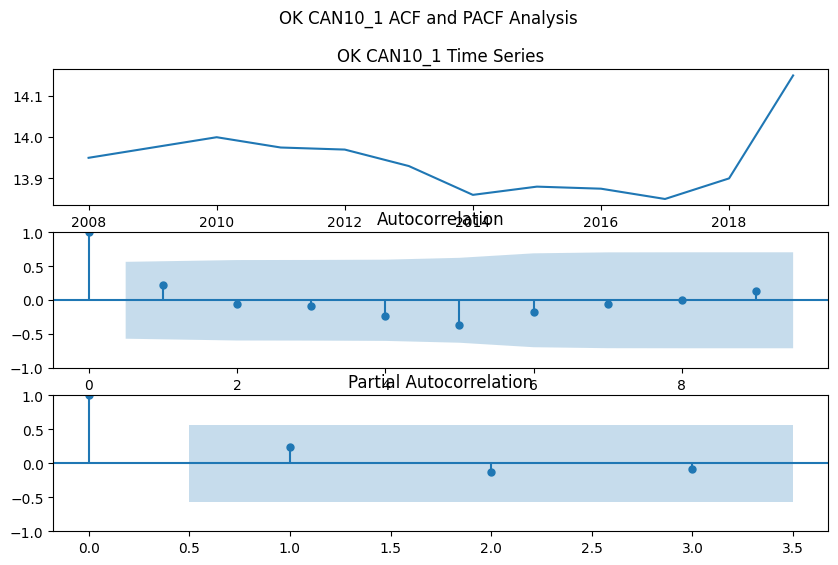

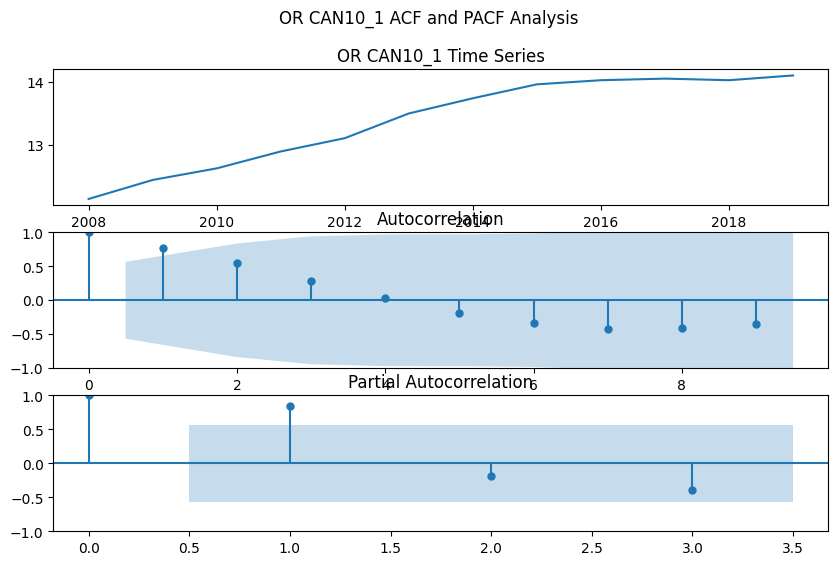

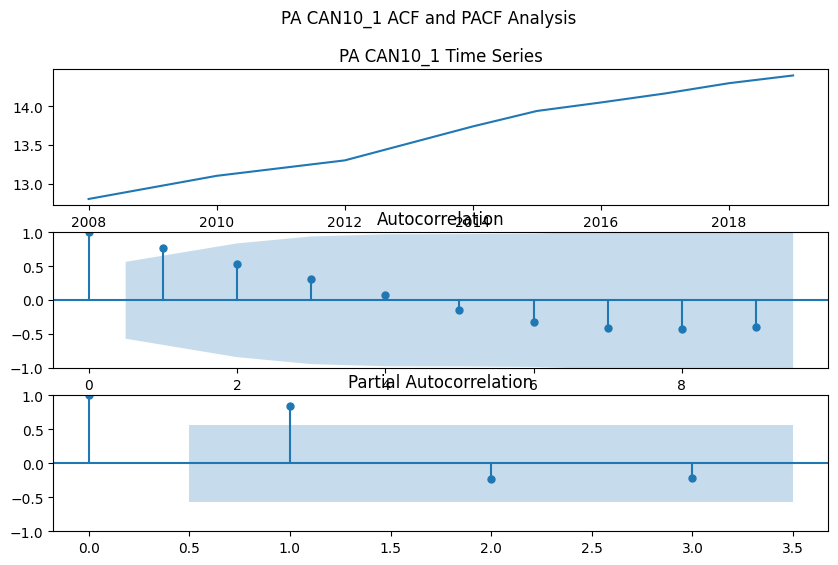

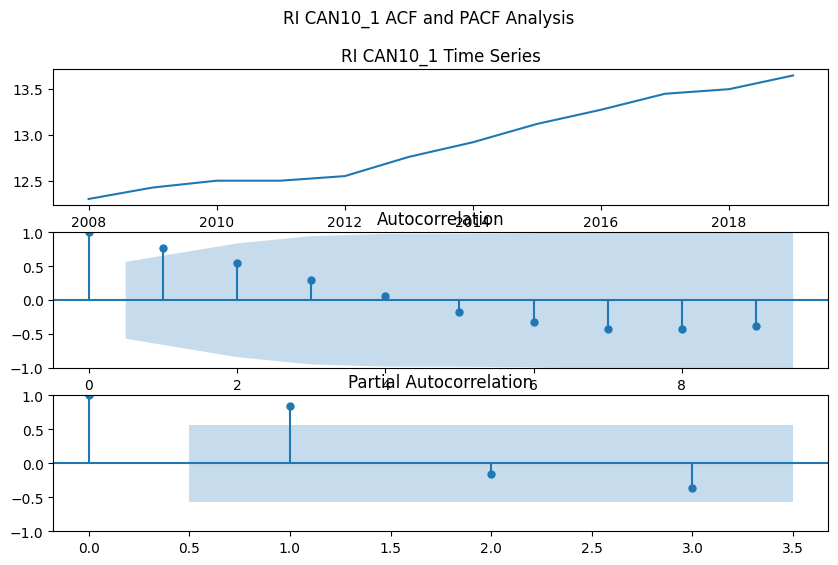

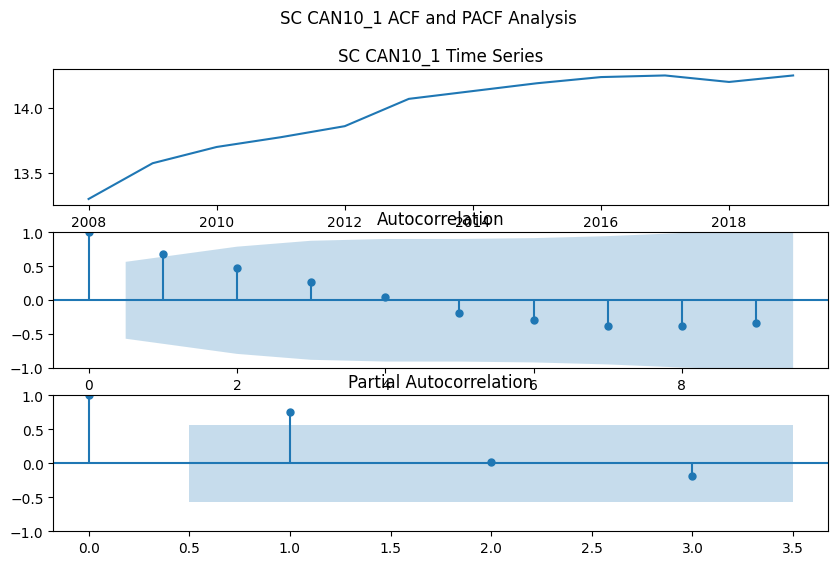

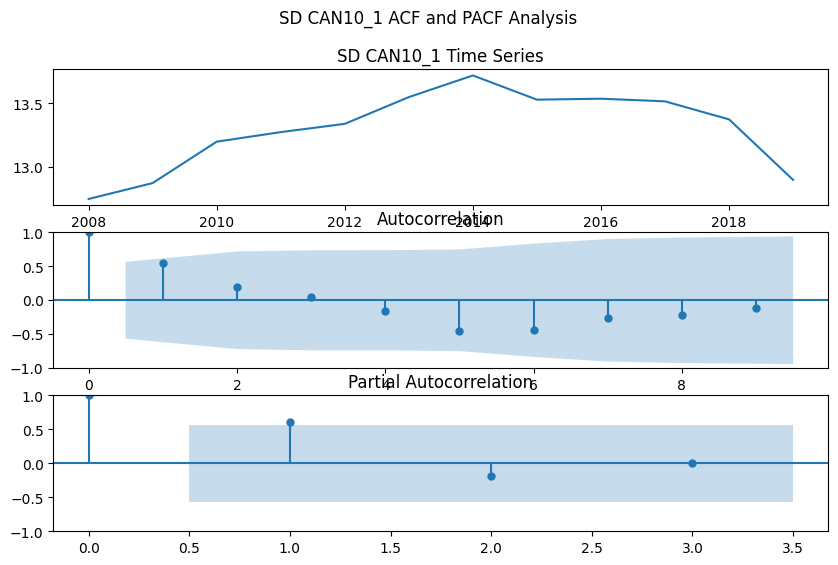

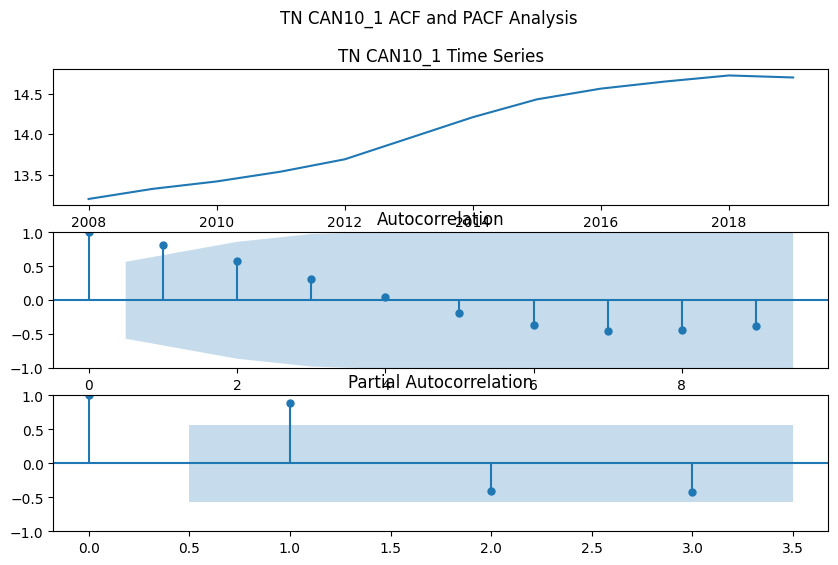

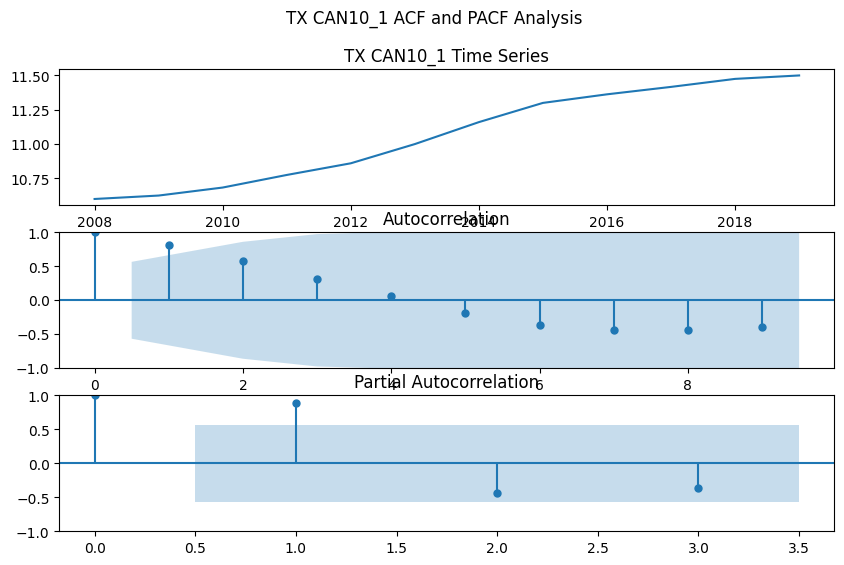

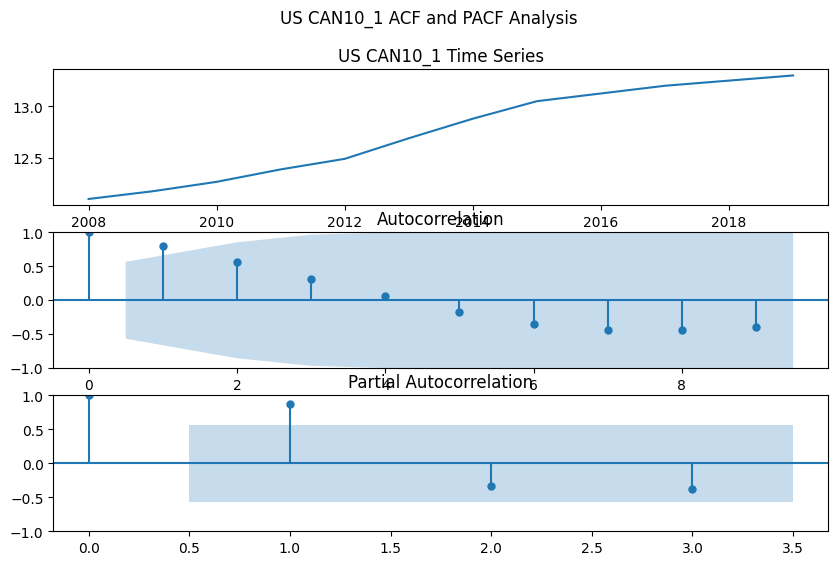

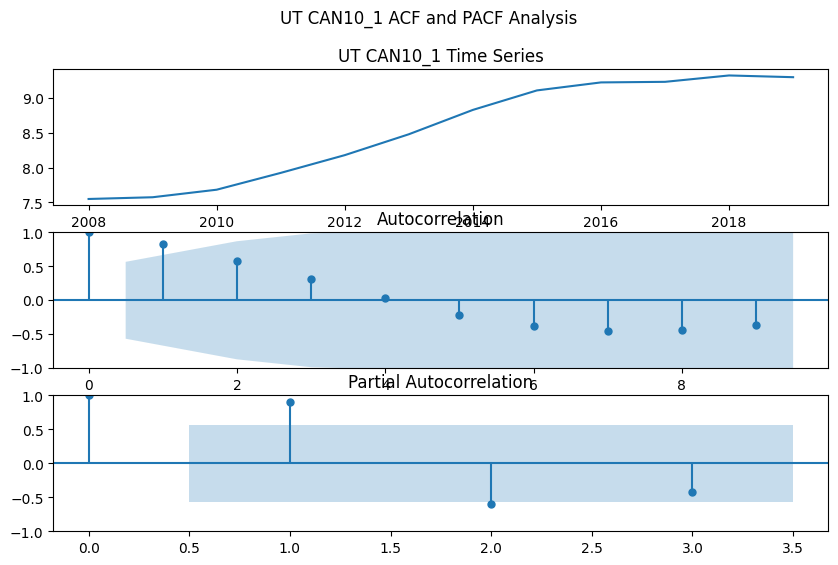

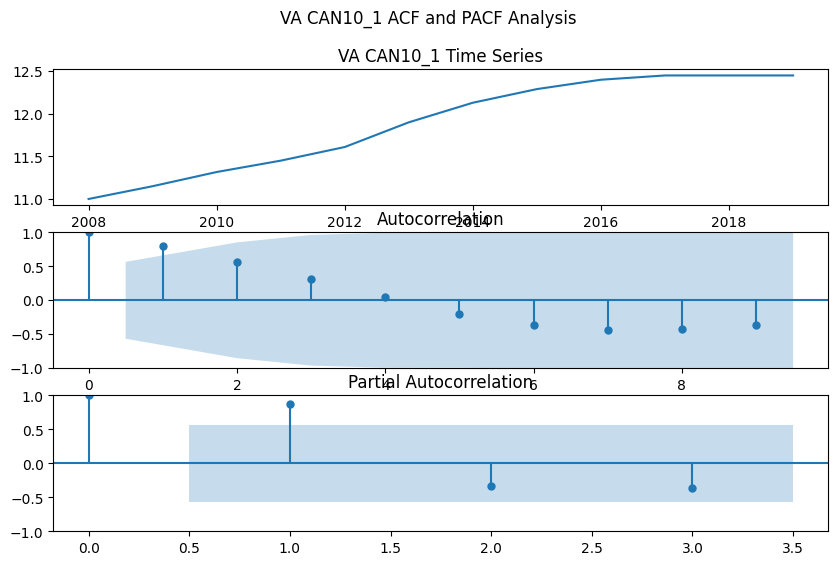

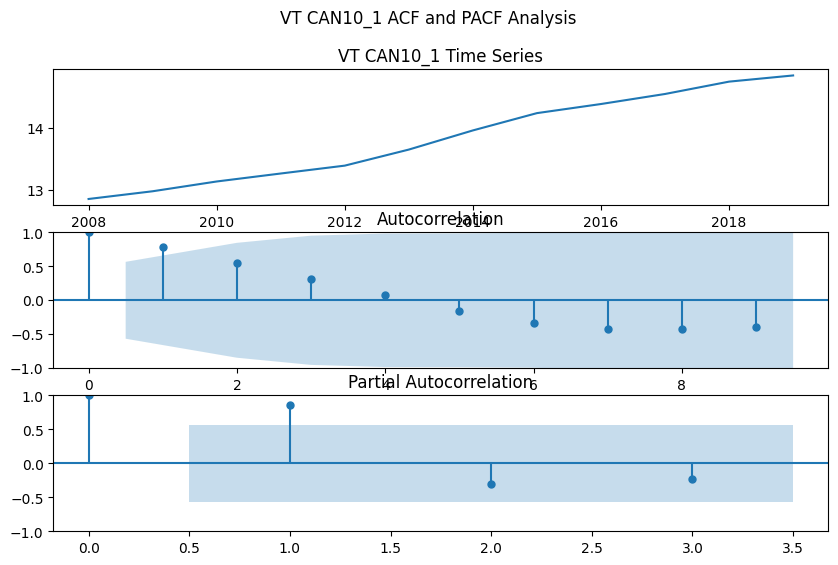

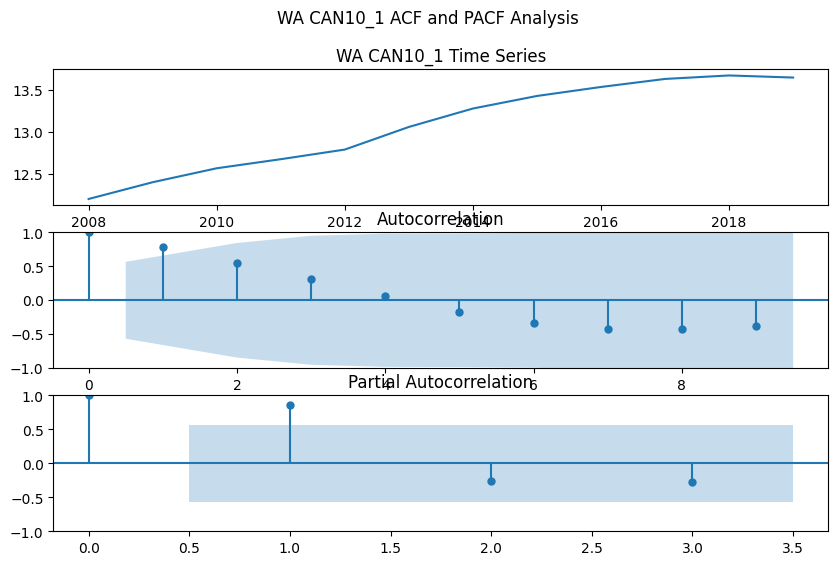

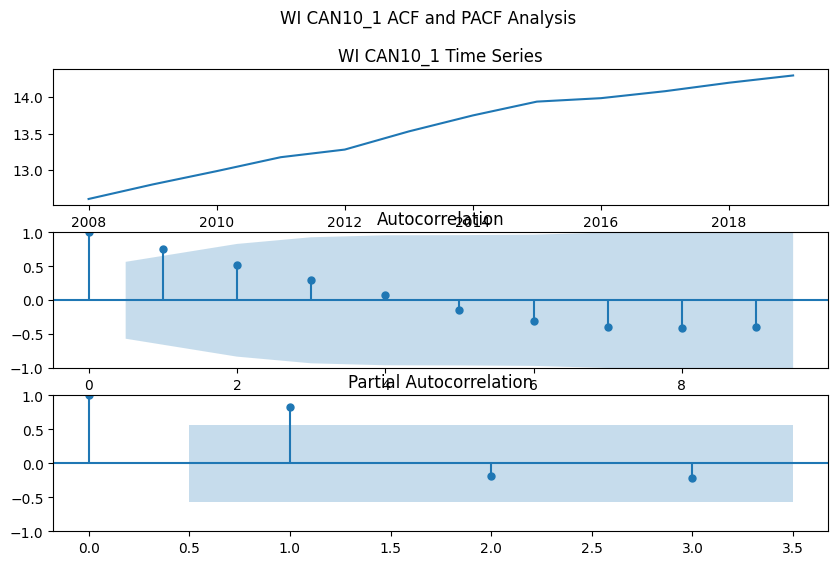

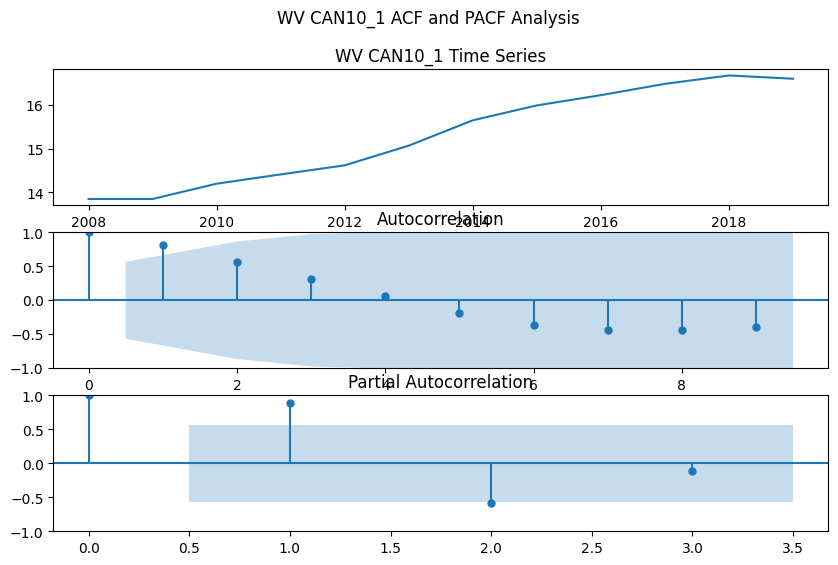

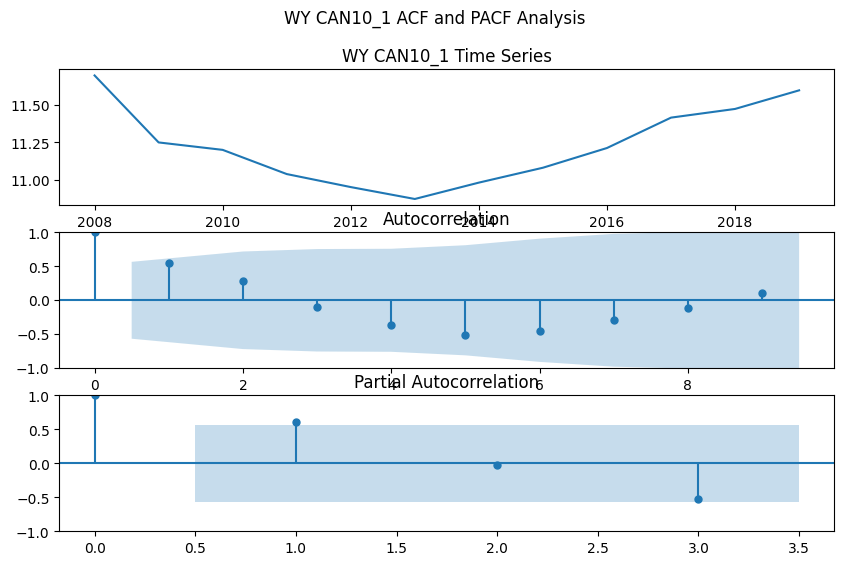

In [29]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Pivot the dataframe to have 'Year' as columns and 'State' as rows
df_pivot = A.pivot(index='State', columns='Year', values='CAN10_1')

# Loop over each state
for state in df_pivot.index:
    # Get the time series for the state
    ts = df_pivot.loc[state].dropna()
    # Perform ACF and PACF analysis
    fig, axes = plt.subplots(3, 1, figsize=(10, 6))
    ts.plot(ax=axes[0])
    axes[0].set_title(f"{state} CAN10_1 Time Series")
    sm.graphics.tsa.plot_acf(ts, lags=9, ax=axes[1])
    sm.graphics.tsa.plot_pacf(ts, lags=3, ax=axes[2])
    fig.suptitle(f"{state} CAN10_1 ACF and PACF Analysis")
    plt.show()


In [30]:
for i in (ny,tex,cal):
    
    for column in tex.columns:
        # Fit an ARIMA model using the auto_arima function
        model = auto_arima(i[column], seasonal=False, error_action="ignore")
        print(f'Column: {column}, ARIMA Model: {model.order}')
        forecast = model.predict(n_periods=1)
        print(f"Predictions for {column}: {forecast}")
    
        # Get the MAE 
        print('MAE: ',mean_absolute_error(tex1[column][-2:-1], forecast))
 
        # Get the MSE 
        print('MSE: ',mean_squared_error(tex1[column][-2:-1], forecast))

        print('R squered: ',r2_score(tex1[column][-2:-1], forecast))

Column: CAN10_1, ARIMA Model: (2, 0, 0)
Predictions for CAN10_1: [12.53720211]
MAE:  1.0622021077371837
MSE:  1.1282733176813156
R squered:  nan
Column: CAN11_1, ARIMA Model: (2, 0, 0)
Predictions for CAN11_1: [141.66948396]
MAE:  41.494483961354504
MSE:  1721.7921992191061
R squered:  nan
Column: CAN5_1, ARIMA Model: (2, 0, 1)
Predictions for CAN5_1: [149.14137401]
MAE:  29.891374005740886
MSE:  893.4942399510819
R squered:  nan
Column: CAN6_1, ARIMA Model: (2, 0, 1)
Predictions for CAN6_1: [8.09664763]
MAE:  1.228352370449775
MSE:  1.5088495459895812
R squered:  nan
Column: CAN7_1, ARIMA Model: (1, 0, 1)
Predictions for CAN7_1: [42.08472636]
MAE:  4.059726361470965
MSE:  16.48137813002228
R squered:  nan
Column: CAN8_1, ARIMA Model: (2, 0, 0)
Predictions for CAN8_1: [65.27677026]
MAE:  16.551770262578337
MSE:  273.96109882517254
R squered:  nan
Column: CAN9_1, ARIMA Model: (2, 0, 1)
Predictions for CAN9_1: [19.92850322]
MAE:  6.178503223169493
MSE:  38.17390207871581
R squered:  nan


In [31]:
results_df = pd.DataFrame(columns=['Year', 'State', 'Cancer', 'Accuracy'])

mse = []

for i,j, state in zip([ny, tex, cal],[ny1, tex1, cal1], ['New York', 'Texas', 'California']):
    for column in i.columns:
        # Fit an ARIMA model using the auto_arima function
        model = auto_arima(i[column], seasonal=False, error_action="ignore")
        forecast = model.predict(n_periods=3)
        mse = mean_squared_error(j[column][-4:-1], forecast)
        #print(f'State: {state}, Cancer: {column}, MSE: {mse}')
        #print('\n')
        results_df = results_df.append({'State': state, 'Cancer': column, 'Accuracy': mse}, ignore_index=True)

In [37]:
# Loop through each state and cancer type
for i, j, state in zip([ny, tex, cal], [ny1, tex1, cal1], ['NY', 'TEX', 'CAL']):
    for column in i.columns:
        # Fit an ARIMA model using the auto_arima function
        model = auto_arima(i[column], seasonal=False, error_action="ignore")
        forecast = model.predict(n_periods=3)
        
        # Calculate the mean squared error for each forecast period
        mse = []
        for k in range(0, 3):
            mse.append((j[column].iloc[-(k+2)] - forecast.iloc[k])**2)
            results_df = results_df.append({'Year': int(2016+k),'State': state, 'Cancer': column, 'Accuracy': mse[k]}, ignore_index=True)

# Reshape the results dataframe
results_df = results_df.pivot_table(index=['Year', 'Cancer', 'State'], values='Accuracy', aggfunc='mean').reset_index()


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [36]:
ny1

,CAN10_1,CAN11_1,CAN5_1,CAN6_1,CAN7_1,CAN8_1,CAN9_1
Year,,,,,,,
2008,11.250000,160.350000,139.800000,8.300000,45.8000,66.900000,18.600000
2009,11.300000,156.800000,140.275000,8.275000,45.1750,66.600000,18.850000
2010,11.383333,153.100000,140.750000,8.216667,44.7000,66.216667,19.000000
2011,11.475000,150.125000,141.662500,8.175000,44.2625,66.012500,19.162500
2012,11.590000,147.340000,142.300000,8.160000,43.9200,65.810000,19.260000
2013,11.810000,142.740000,143.810000,8.140000,43.2600,65.470000,19.520000
2014,12.050000,140.100000,145.440000,8.100000,42.7600,65.230000,19.660000
2015,12.300000,140.070000,147.360000,8.080000,42.3600,65.170000,19.790000
2016,12.437500,139.787500,148.100000,8.087500,42.2125,65.112500,19.825000


In [176]:
results_df = results_df.sort_values(by=['State','Cancer','Year'], ascending=True)

In [177]:
results_df

,Year,Cancer,State,Accuracy
0,2016,CAN10_1,CAL,0.000830
21,2017,CAN10_1,CAL,0.000113
42,2018,CAN10_1,CAL,0.000064
3,2016,CAN11_1,CAL,0.340938
24,2017,CAN11_1,CAL,0.772645
...,...,...,...,...
38,2017,CAN8_1,TEX,0.300338
59,2018,CAN8_1,TEX,2.094331
20,2016,CAN9_1,TEX,0.461267
41,2017,CAN9_1,TEX,0.213906


In [178]:
results_df.to_csv("BasisModelAcc.csv", index=False)